
### Welcome to my data science project!


- Intro :
- In this project, we are going to do a classification project to help a finance company classify their consumers' credit score based on the consumers' credit-related information. The company has been doing this classification task manually over the years and now has decided to build an intelligent system that can do this automatically using the data that has been gathered up until this point. The management of the company asked me, a data scientist, to help building the classification models.


- Business Goal :
- Perform credit score classification for a finance company's consumers based on their credit-related information.


- Project Tasks :

- Perform the preparation task by cleaning Train and Test dataframes before using them for the classification modelling.
- Build the classification model using the Train dataframe to learn the nature of the data.
- Perform the classification on the Test dataframe using the model with the highest accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max.columns',100)

In [3]:
train=pd.read_csv("E:\\credit score classifiaction\\train.csv")
test=pd.read_csv("E:\\credit score classifiaction\\test.csv")

In [4]:
train.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

# Check for null values

In [7]:
null_train=(train.isnull().sum()/len(train))*100
null_test=(test.isnull().sum()/len(test))*100
print(null_train)
print(null_test)

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64
ID   

In [8]:
null_train_features = []
not_null_train_features = []

for i in train.columns:
    if train[i].isnull().any():
        null_train_features.append(i)
    else:
        not_null_train_features.append(i)
print(f"null features:{null_train_features}")
print(f"not_null features:{not_null_train_features}")

null features:['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']
not_null features:['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour', 'Credit_Score']


In [9]:
null_test_features = []
not_null_test_features = []

for i in test.columns:
    if test[i].isnull().any():
        null_test_features.append(i)
    else:
        not_null_test_features.append(i)
print(f"null features:{null_test_features}")
print(f"not_null features:{not_null_test_features}")

null features:['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']
not_null features:['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour']


### As we can see in both train and test data,features which have null values are null features:['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

In [10]:
import re

In [11]:
train['Annual_Income']=train['Annual_Income'].apply(lambda x:re.sub('_','',str(x)))
train['Outstanding_Debt']=train['Outstanding_Debt'].apply(lambda x:re.sub('_','',str(x)))
train['Monthly_Balance']=pd.to_numeric(train['Monthly_Balance'],errors='coerce')
train['Amount_invested_monthly']=train['Amount_invested_monthly'].apply(lambda x:re.sub('__','',str(x)))
train['Num_of_Loan']=pd.to_numeric(train['Num_of_Loan'],errors='coerce')
train['Num_of_Delayed_Payment']=train['Num_of_Delayed_Payment'].apply(lambda x:re.sub('_','',str(x)))
train['Changed_Credit_Limit']=train['Changed_Credit_Limit'].apply(lambda x:re.sub('_','',str(x)))
train['Outstanding_Debt']=train['Outstanding_Debt'].apply(lambda x:re.sub('_','',str(x)))
train['Amount_invested_monthly']=train['Amount_invested_monthly'].apply(lambda x:re.sub('__','',str(x)))
train['Monthly_Balance']=pd.to_numeric(train['Monthly_Balance'],errors='coerce')
train['Occupation']=train['Occupation'].apply(lambda x:np.nan if x=='_______' else x)
train['Payment_Behaviour']=train['Payment_Behaviour'].apply(lambda x:np.nan if x=='!@9#%8' else x)
train['Credit_Mix']=train['Credit_Mix'].apply(lambda x:np.nan if x=='_' else x)

In [12]:
Month_dict={'April':4, 'August':8, 'February':2, 'January':1, 'July':7, 'June':6, 'March':3,
       'May':5}

In [13]:
Occupation={'Scientist':1, 'Teacher':2, 'Engineer':3, 'Entrepreneur':4,
       'Developer':5, 'Lawyer':6, 'Media_Manager':7, 'Doctor':8, 'Journalist':9,
       'Manager':10, 'Accountant':11, 'Musician':12, 'Mechanic':13, 'Writer':14,
       'Architect':15}

In [14]:
Payment_Behaviour={'Low_spent_Small_value_payments':0,'High_spent_Medium_value_payments':1,'Low_spent_Medium_value_payments ':2,'High_spent_Large_value_payments':3,'High_spent_Small_value_payments':4,'Low_spent_Large_value_payments':5}

In [15]:
train['Credit_History_Age'] = train['Credit_History_Age'].astype(str)
train['Credit_History_Years'] = train['Credit_History_Age'].apply(lambda x: int(x.split()[0]) if 'Years' in x else 0)
train['Credit_History_Months'] = train['Credit_History_Age'].apply(lambda x: int(x.split()[3]) if 'Months' in x else 0)

In [16]:
train['Age']=train['Age'].apply(lambda x:re.sub('_','',str(x)))
train['Age']=train['Age'].astype('int64')
train['Age']=train['Age'].mask(train['Age']>100,np.nan)
train['Age']=train['Age'].mask(train['Age']<0,np.nan)

In [17]:
train.Payment_Behaviour

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                                 NaN
Name: Payment_Behaviour, Length: 100000, dtype: object

In [18]:
train['Annual_Income']=train['Annual_Income'].astype('float64')
train['Outstanding_Debt']=train['Outstanding_Debt'].astype('float64')
train['Amount_invested_monthly']=train['Amount_invested_monthly'].astype('float64')

In [19]:
train['Num_of_Delayed_Payment']=pd.to_numeric(train['Num_of_Delayed_Payment'],errors='coerce')
train['Changed_Credit_Limit']=pd.to_numeric(train['Changed_Credit_Limit'],errors='coerce')

In [20]:
Credit_History_Age=train.Credit_History_Age
Month=train.Month
Credit_Score=train.Credit_Score

In [21]:
train.select_dtypes('object').columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       97224 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

In [23]:
numeric_cols=train.select_dtypes(np.number).columns
len(numeric_cols)

18

In [24]:
numeric_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Years', 'Credit_History_Months'],
      dtype='object')

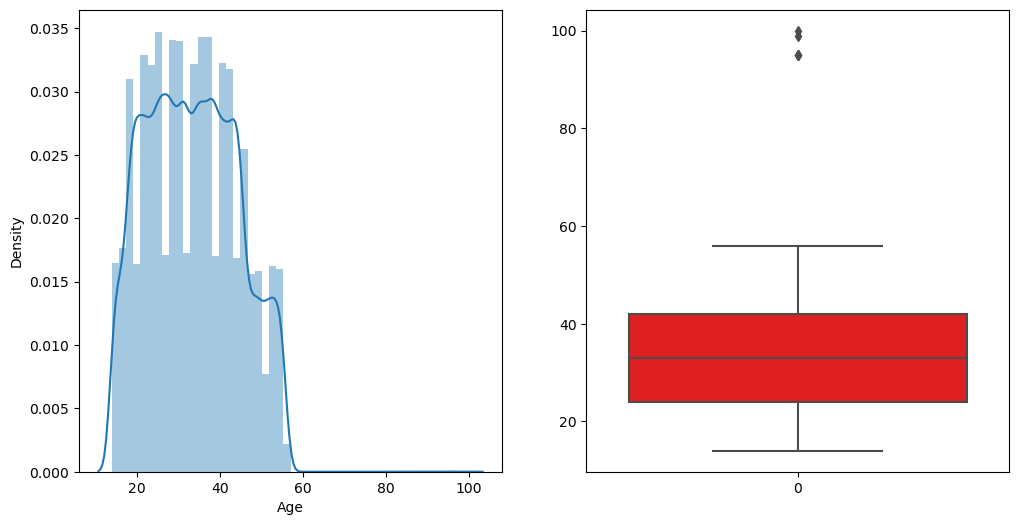

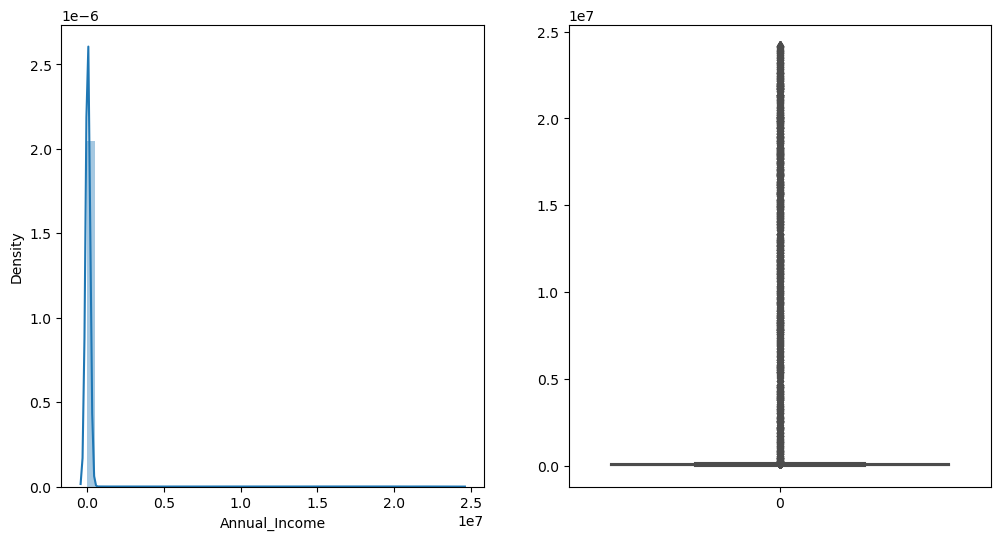

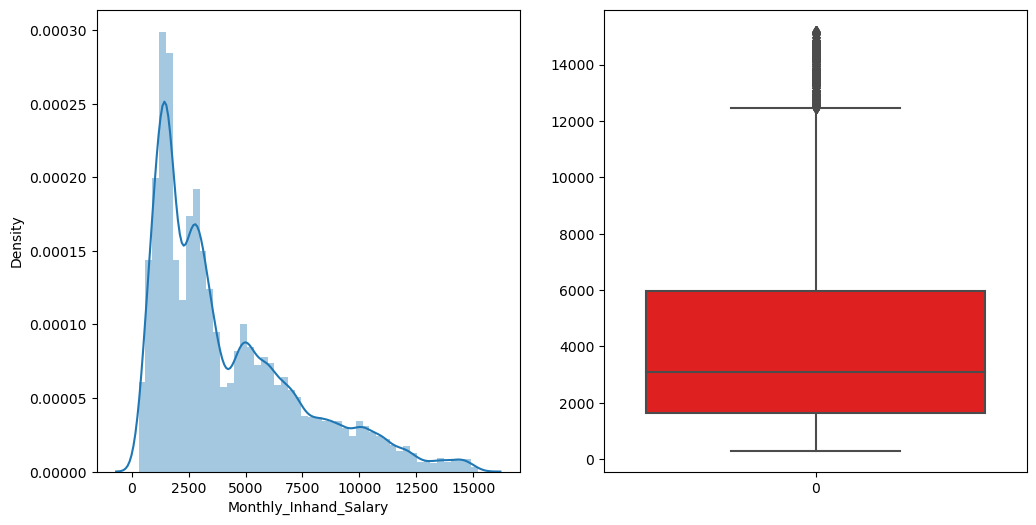

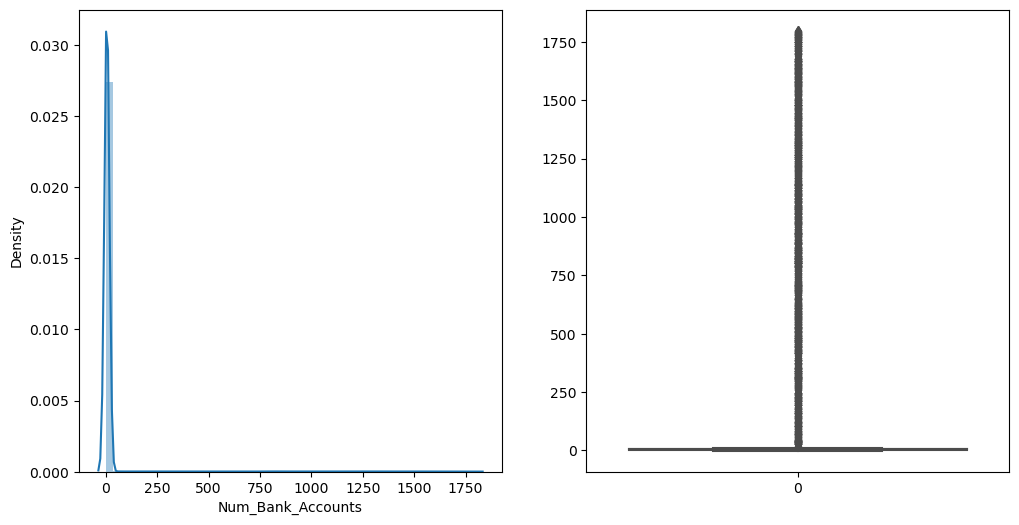

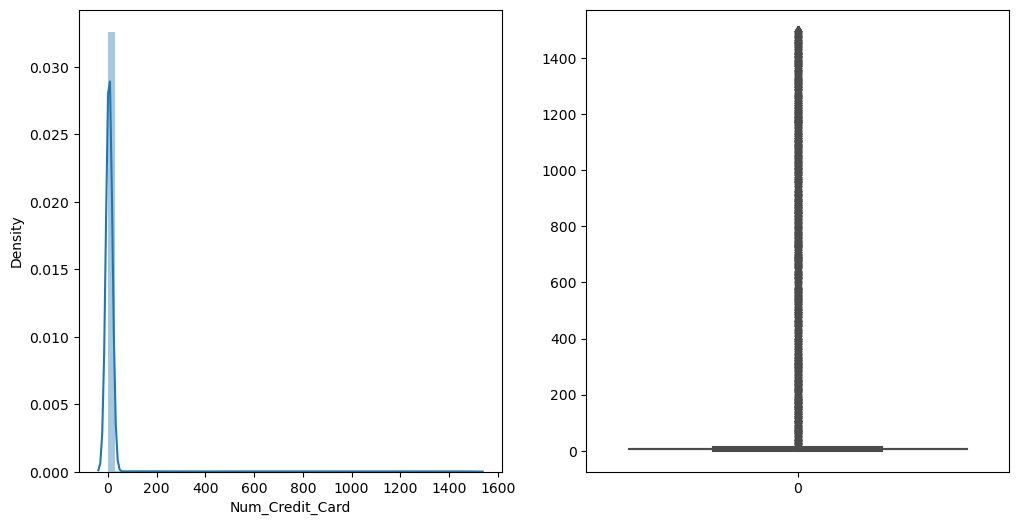

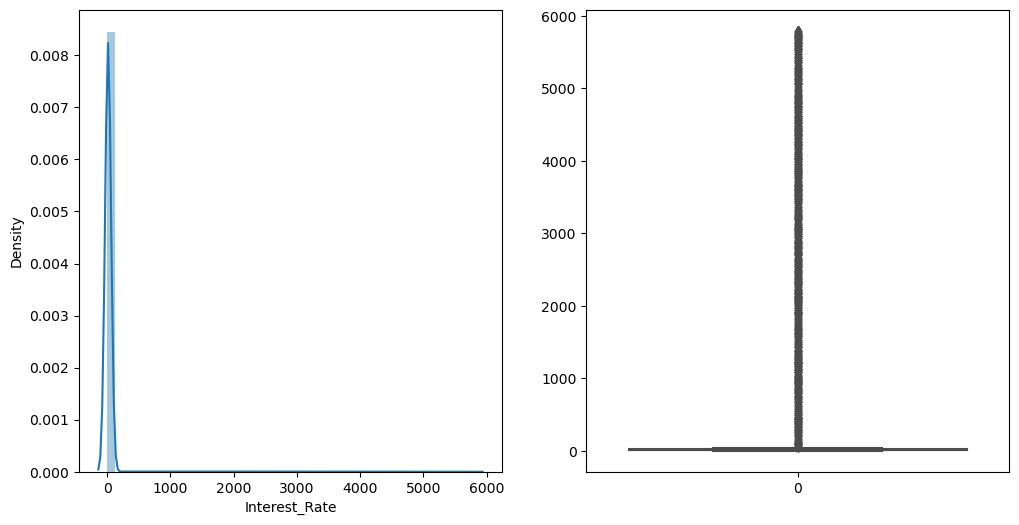

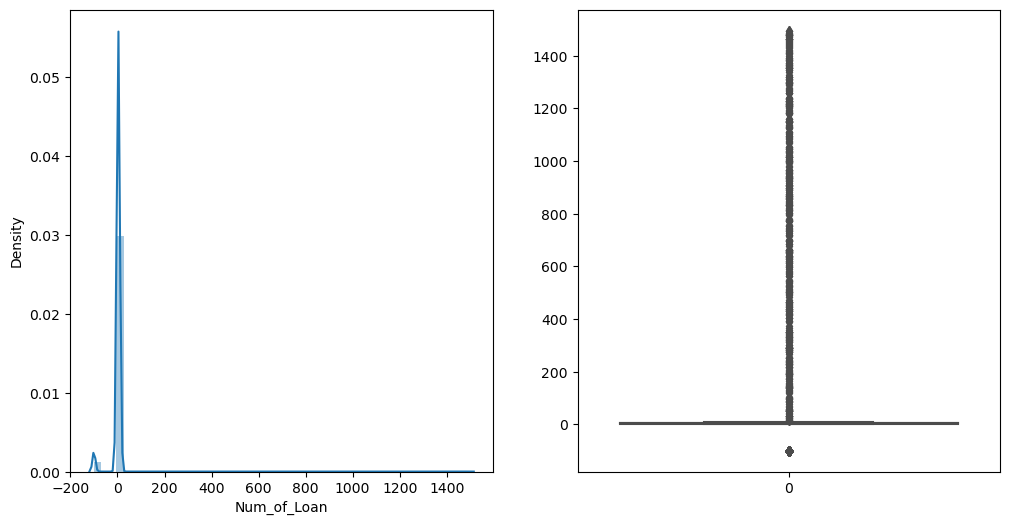

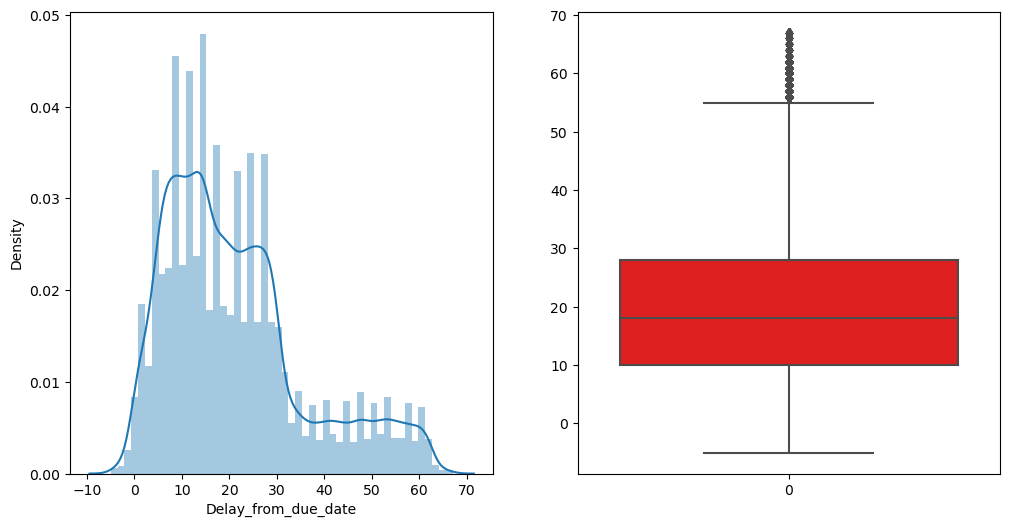

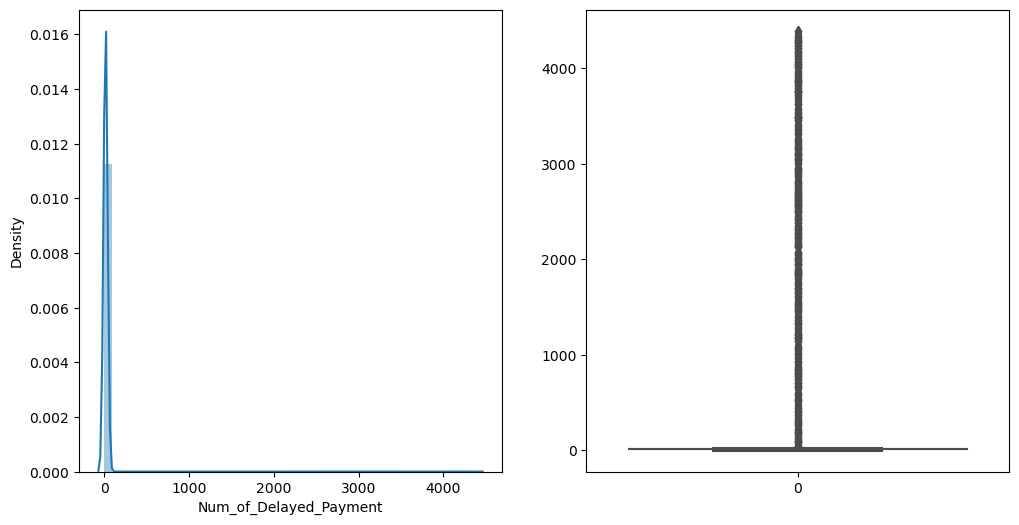

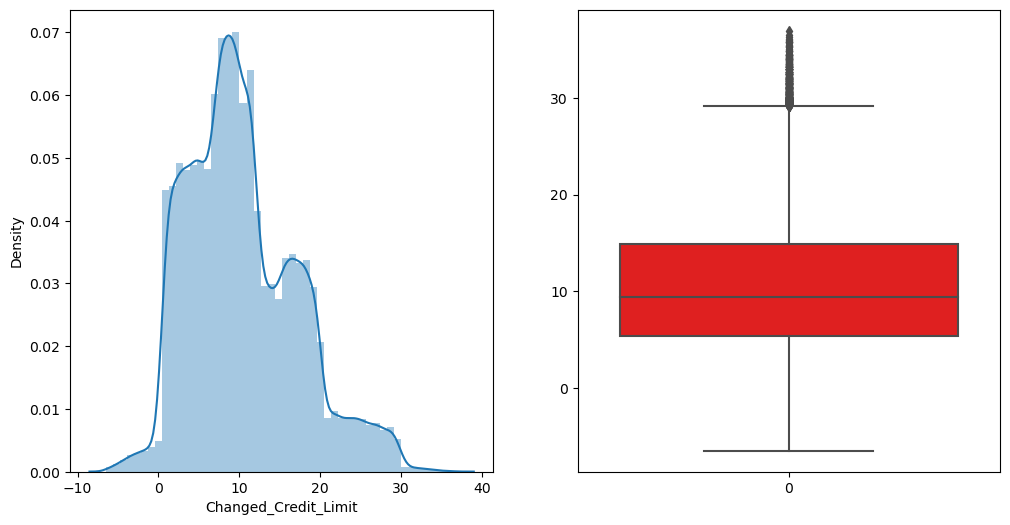

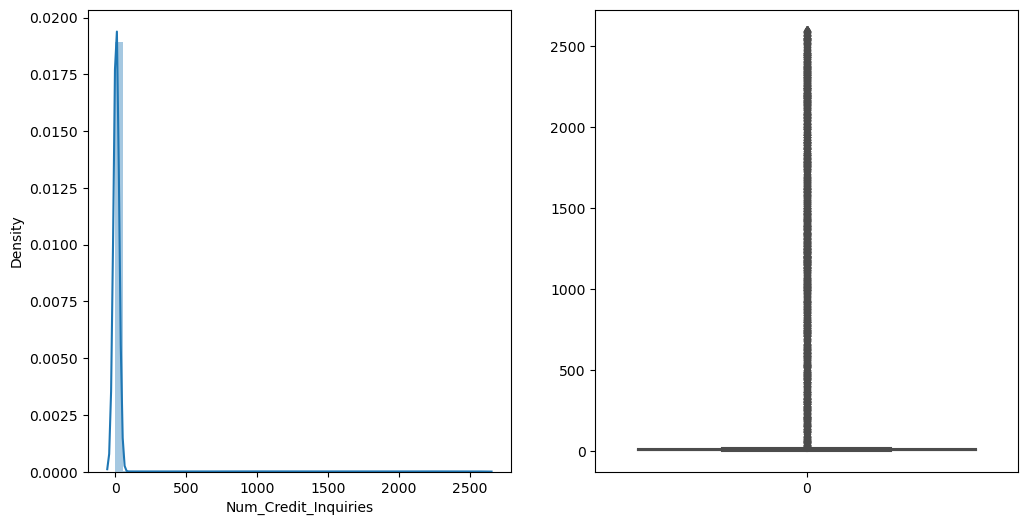

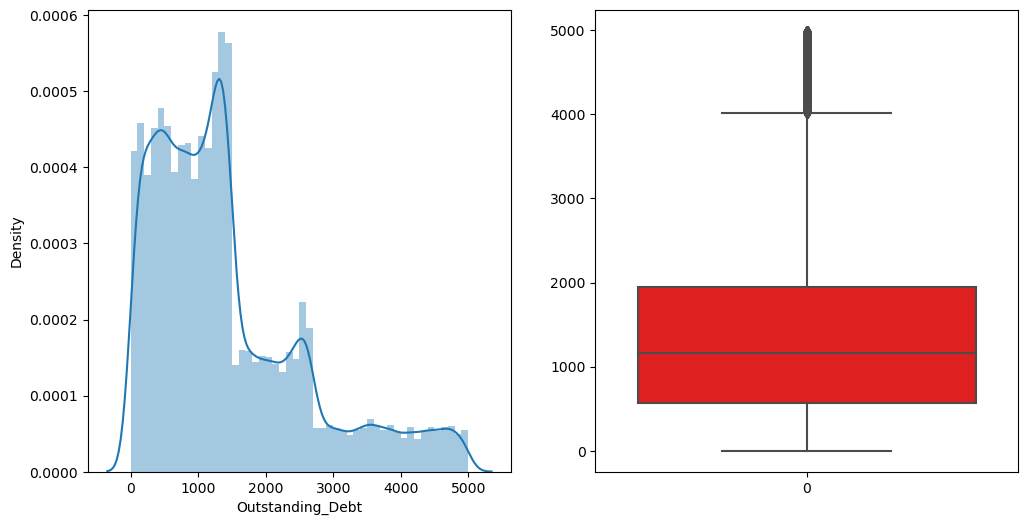

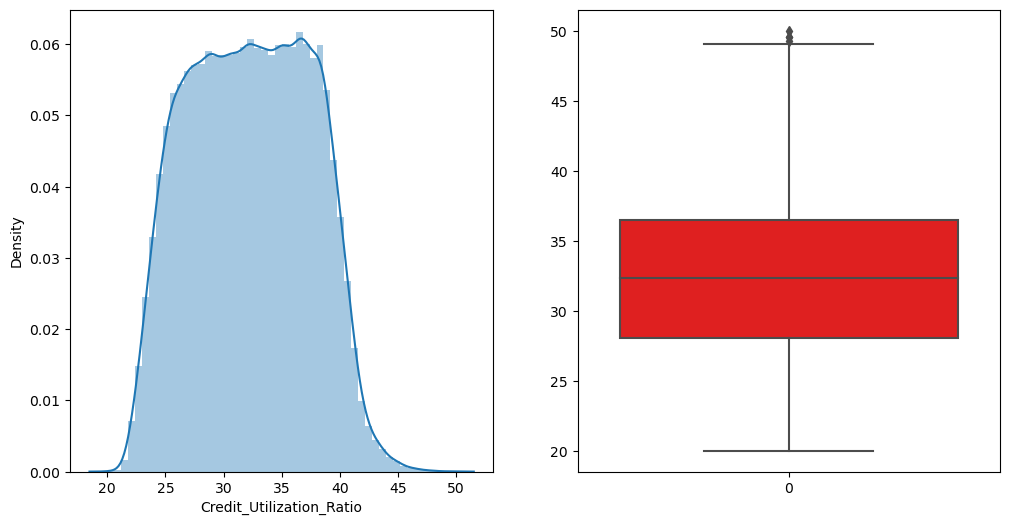

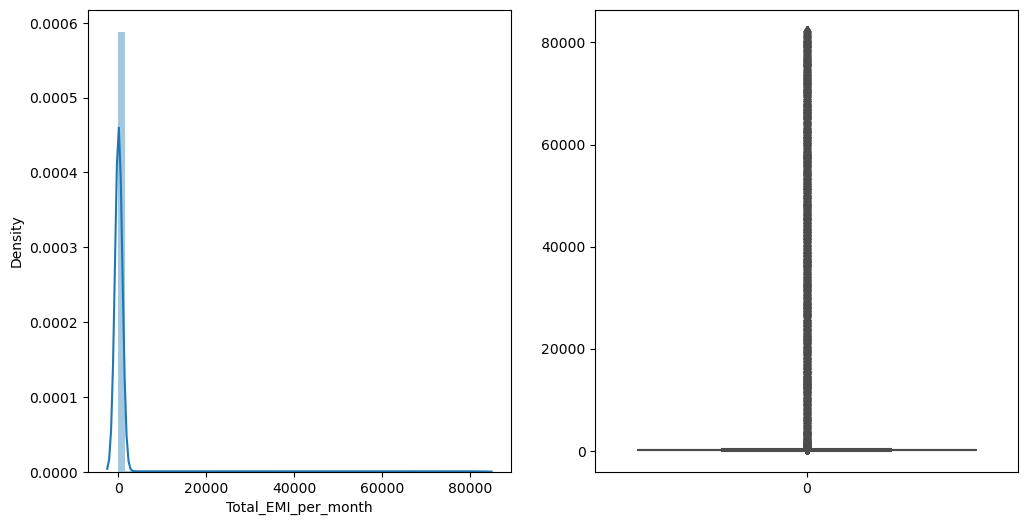

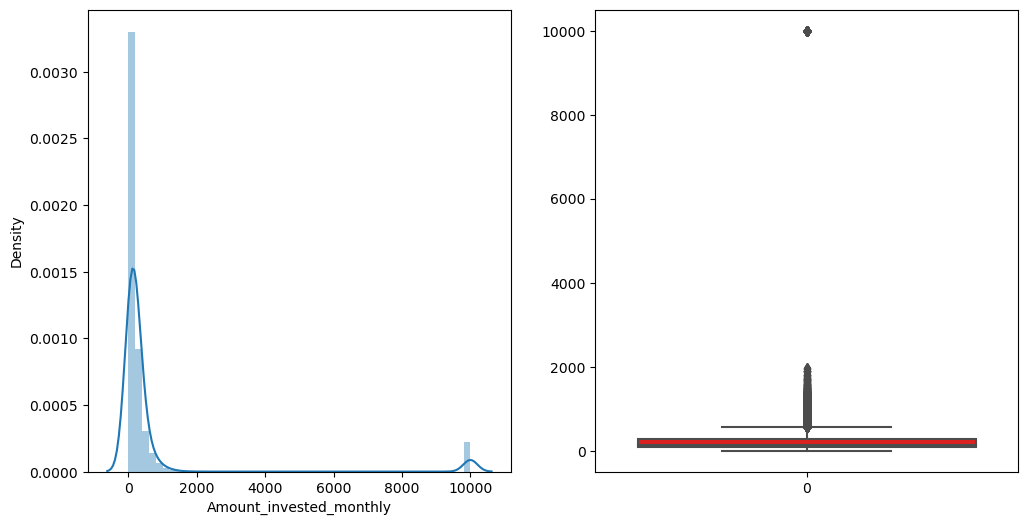

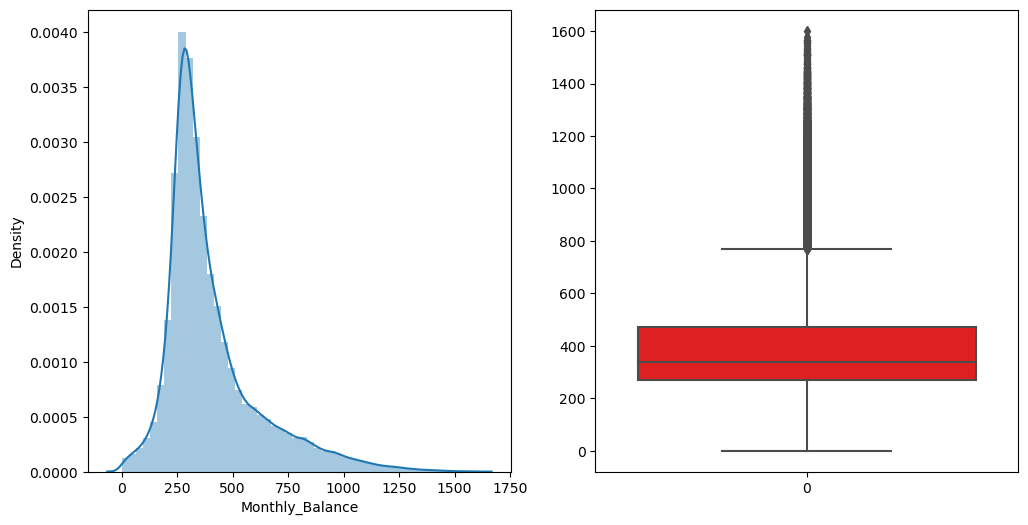

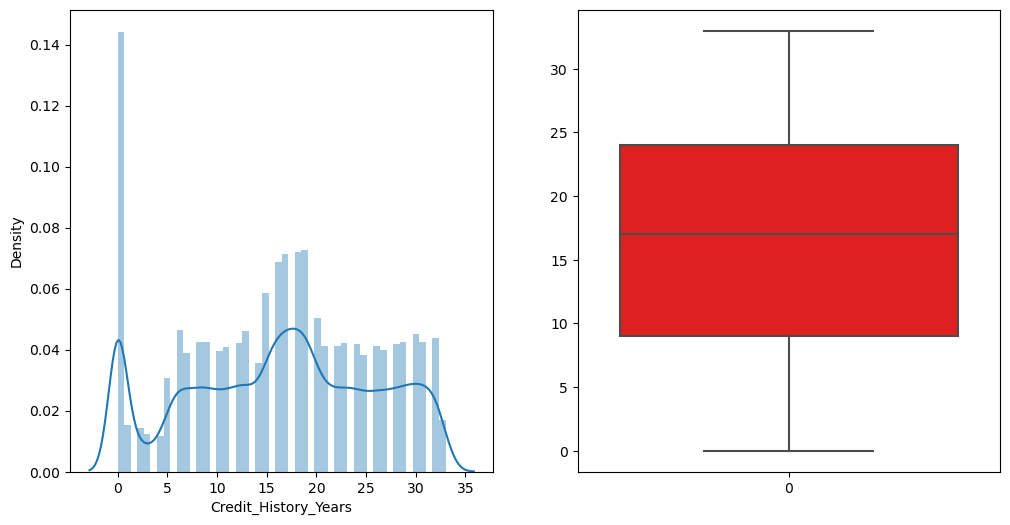

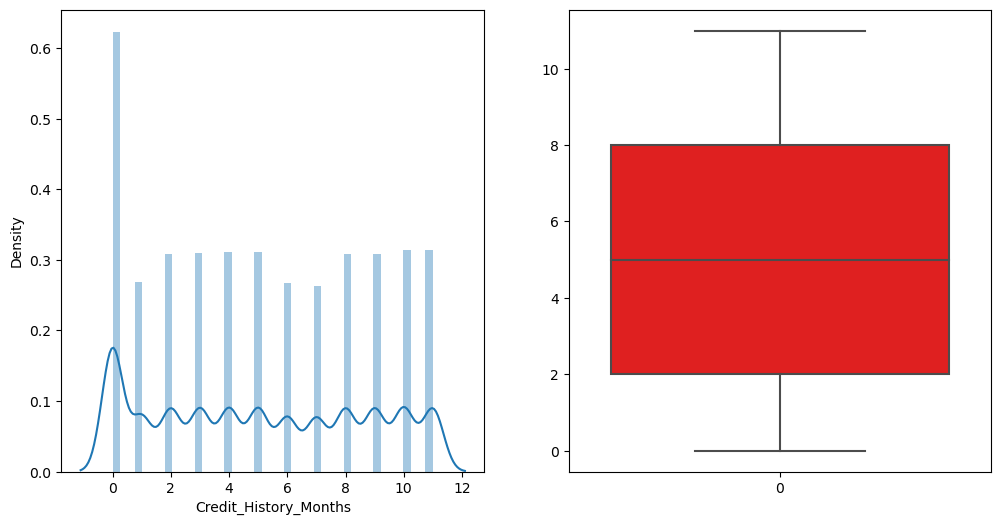

In [25]:
count=0
for i in numeric_cols:
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
    sns.distplot(train[i],ax=ax[0])
    sns.boxplot(train[i],ax=ax[1],color='red')
    count+=1

# As per the above plot we can see that all the features are having the skewed distributions and contains lots of outliers

In [26]:
# Imputing the null values based on the distribution of each attributes

In [27]:
dist_sk=pd.DataFrame({'Skewness':train.skew(),'Kurtosis':train.kurtosis()})
dist_sk

,Skewness,Kurtosis
Age,0.164750,-0.872849
Annual_Income,12.512173,164.388845
Monthly_Inhand_Salary,1.127272,0.613098
Num_Bank_Accounts,11.202482,132.509995
Num_Credit_Card,8.458017,74.544452
Interest_Rate,9.006015,85.182475
Num_of_Loan,15.888245,307.305378
Delay_from_due_date,0.966395,0.348294
Num_of_Delayed_Payment,14.313136,217.181949
Changed_Credit_Limit,0.638783,0.101445


- You can use central tendency measures such as mean, median or mode of the numeric feature column to replace or impute missing values.
- You can use mean value to replace the missing values in case the data distribution is symmetric.
- Consider using median or mode with skewed data distribution.
- Pandas Dataframe method in Python such as fillna can be used to replace the missing values.
- Methods such as mean(), median() and mode() can be used on data frame for finding their values.
- It is important to keep in mind that imputing missing values with summary statistics like mean, median, or mode can introduce bias in the data
- It is recommended that we evaluate the impact of different imputation strategies on the performance of the machine learning model using cross-validation techniques

In [28]:
below_1=dist_sk[(dist_sk['Skewness']<1) & (dist_sk['Skewness']>-1)]
below_1

,Skewness,Kurtosis
Age,0.164750,-0.872849
Delay_from_due_date,0.966395,0.348294
Changed_Credit_Limit,0.638783,0.101445
Credit_Utilization_Ratio,0.028617,-0.944023
Credit_History_Years,-0.128466,-0.948511
Credit_History_Months,0.088037,-1.301896


In [29]:
above_1=dist_sk[(~(dist_sk['Skewness']<1) & (dist_sk['Skewness']>-1))]
above_1

,Skewness,Kurtosis
Annual_Income,12.512173,164.388845
Monthly_Inhand_Salary,1.127272,0.613098
Num_Bank_Accounts,11.202482,132.509995
Num_Credit_Card,8.458017,74.544452
Interest_Rate,9.006015,85.182475
Num_of_Loan,15.888245,307.305378
Num_of_Delayed_Payment,14.313136,217.181949
Num_Credit_Inquiries,9.786246,100.597248
Outstanding_Debt,1.207536,0.904984
Total_EMI_per_month,7.102524,52.220309


In [30]:
# Replave the null values with mean value,when the attribute skewness is less than 1(nearly normally distributed)
# Replave the null values with median value,when the attribute skewness is above 1

(<Figure size 1200x600 with 2 Axes>, <AxesSubplot:>)

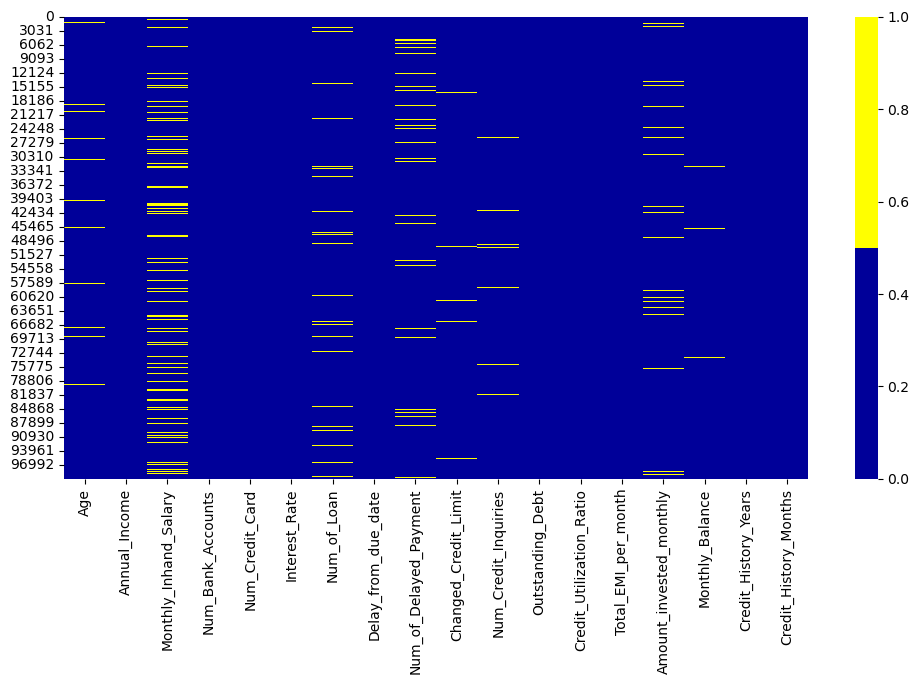

In [31]:
fig=plt.figure(figsize=(12,6))
colours = ['#000099', '#ffff00'] 
fig,sns.heatmap(train[[col for col in train.select_dtypes(exclude='object')]].isnull(), cmap=sns.color_palette(colours))

In [32]:
#sns.pairplot(train)

(<Figure size 1800x1000 with 2 Axes>, <AxesSubplot:>)

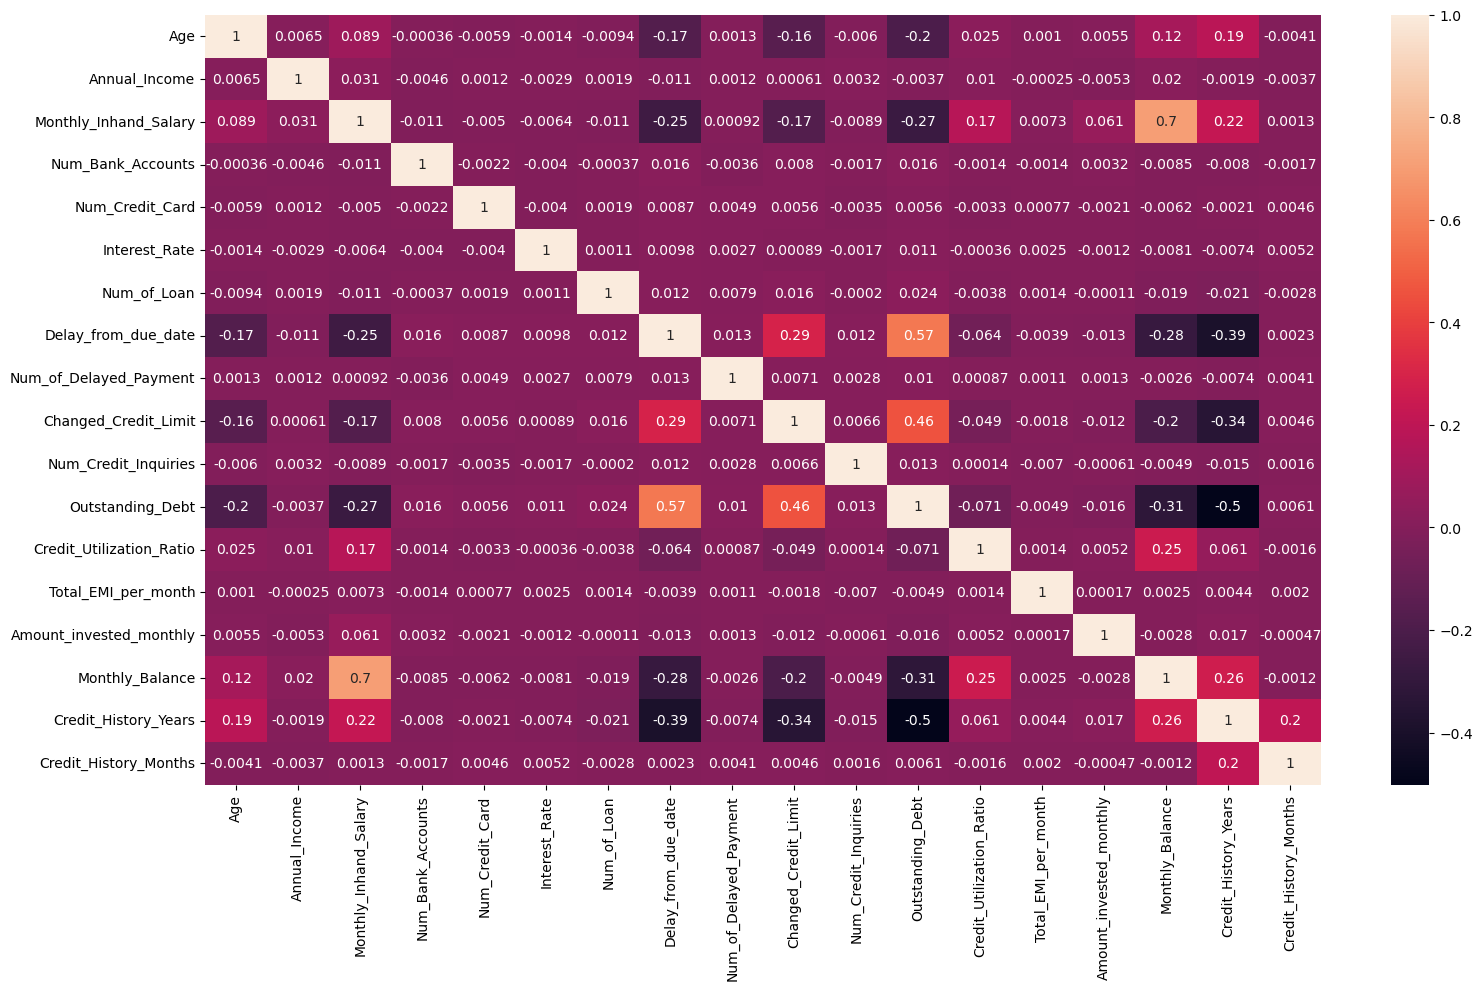

In [33]:
fig=plt.figure(figsize=(18,10))
fig,sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

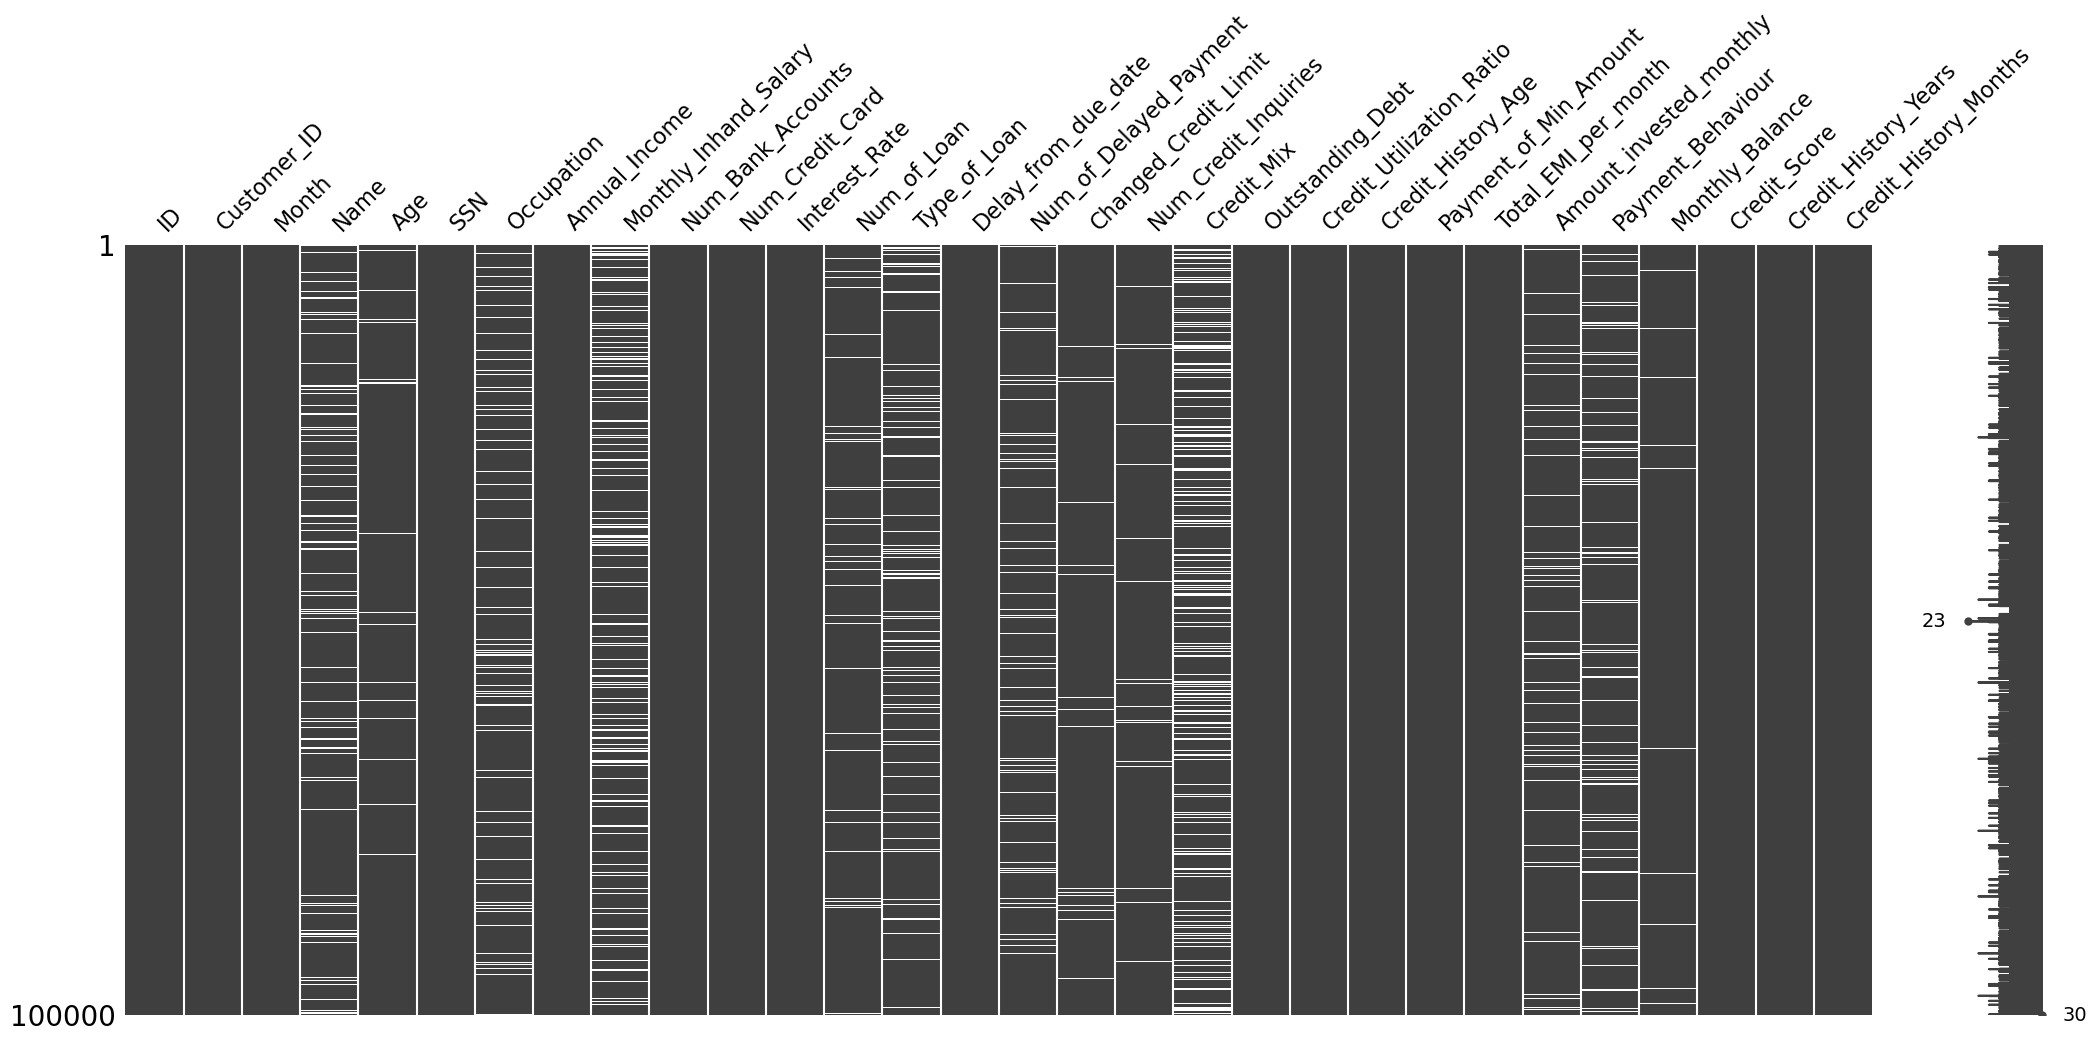

In [34]:
import missingno as msno
msno.matrix(train)
#sns.set(style='whitegrid')

### Coeff between 'Monthly_Inhand_Salary' & 'Monthly_Balance' is 0.7,so we use the linear regression method to fill the null values

In [35]:
train['Monthly_Balance'].fillna(train['Monthly_Balance'].median(),inplace=True)

In [36]:
train1=train.copy()
test1=test.copy()

# From categorical column converted to Numerical columns

In [37]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in train.select_dtypes('object').columns:
    train[i]=lb.fit_transform(train[i])

# KNN Imputer

In [38]:
from sklearn.impute import KNNImputer

knn_impute=KNNImputer(n_neighbors=5)

# impute missing values
train_imputed = pd.DataFrame(knn_impute.fit_transform(train), columns=train.columns)

# print the imputed dataframe
train_imputed

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,16406.0,12320.0,3.0,84.0,23.0,10205.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128.0,3.0,7.0,11.27,4.0,3.0,809.98,26.822620,180.0,1.0,49.574949,80.415295,2.0,312.494089,0.0,22.0,1.0
1,16417.0,12320.0,2.0,84.0,23.0,10205.0,12.0,19114.12,1530.815000,3.0,4.0,3.0,4.0,128.0,-1.0,6.0,11.27,4.0,1.0,809.98,31.944960,404.0,1.0,49.574949,118.280222,3.0,284.629162,0.0,0.0,0.0
2,16428.0,12320.0,6.0,84.0,23.0,10205.0,12.0,19114.12,1530.815000,3.0,4.0,3.0,4.0,128.0,3.0,7.0,9.87,4.0,1.0,809.98,28.609352,184.0,1.0,49.574949,81.699521,4.0,331.209863,0.0,22.0,3.0
3,16441.0,12320.0,0.0,84.0,23.0,10205.0,12.0,19114.12,1530.815000,3.0,4.0,3.0,4.0,128.0,5.0,4.0,6.27,4.0,1.0,809.98,31.377862,185.0,1.0,49.574949,199.458074,5.0,223.451310,0.0,22.0,4.0
4,16452.0,12320.0,7.0,84.0,23.0,10205.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128.0,6.0,6.0,11.27,4.0,1.0,809.98,24.797347,186.0,1.0,49.574949,41.420153,1.0,341.489231,0.0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62788.0,8833.0,0.0,6528.0,25.0,1009.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,23.0,7.0,11.50,3.0,3.0,502.38,34.663572,307.0,1.0,35.104023,60.971333,0.0,479.866228,1.0,31.0,6.0
99996,62789.0,8833.0,7.0,6528.0,25.0,1009.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,18.0,7.0,11.50,3.0,3.0,502.38,40.565631,308.0,1.0,35.104023,54.185950,1.0,496.651610,1.0,31.0,7.0
99997,62790.0,8833.0,5.0,6528.0,25.0,1009.0,9.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,683.0,27.0,6.0,11.50,3.0,1.0,502.38,41.255522,309.0,1.0,35.104023,24.028477,0.0,516.809083,1.0,31.0,8.0
99998,62791.0,8833.0,4.0,6528.0,25.0,1009.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,20.0,8.6,11.50,3.0,1.0,502.38,33.638208,310.0,1.0,35.104023,251.672582,3.0,319.164979,2.0,31.0,9.0


<AxesSubplot:>

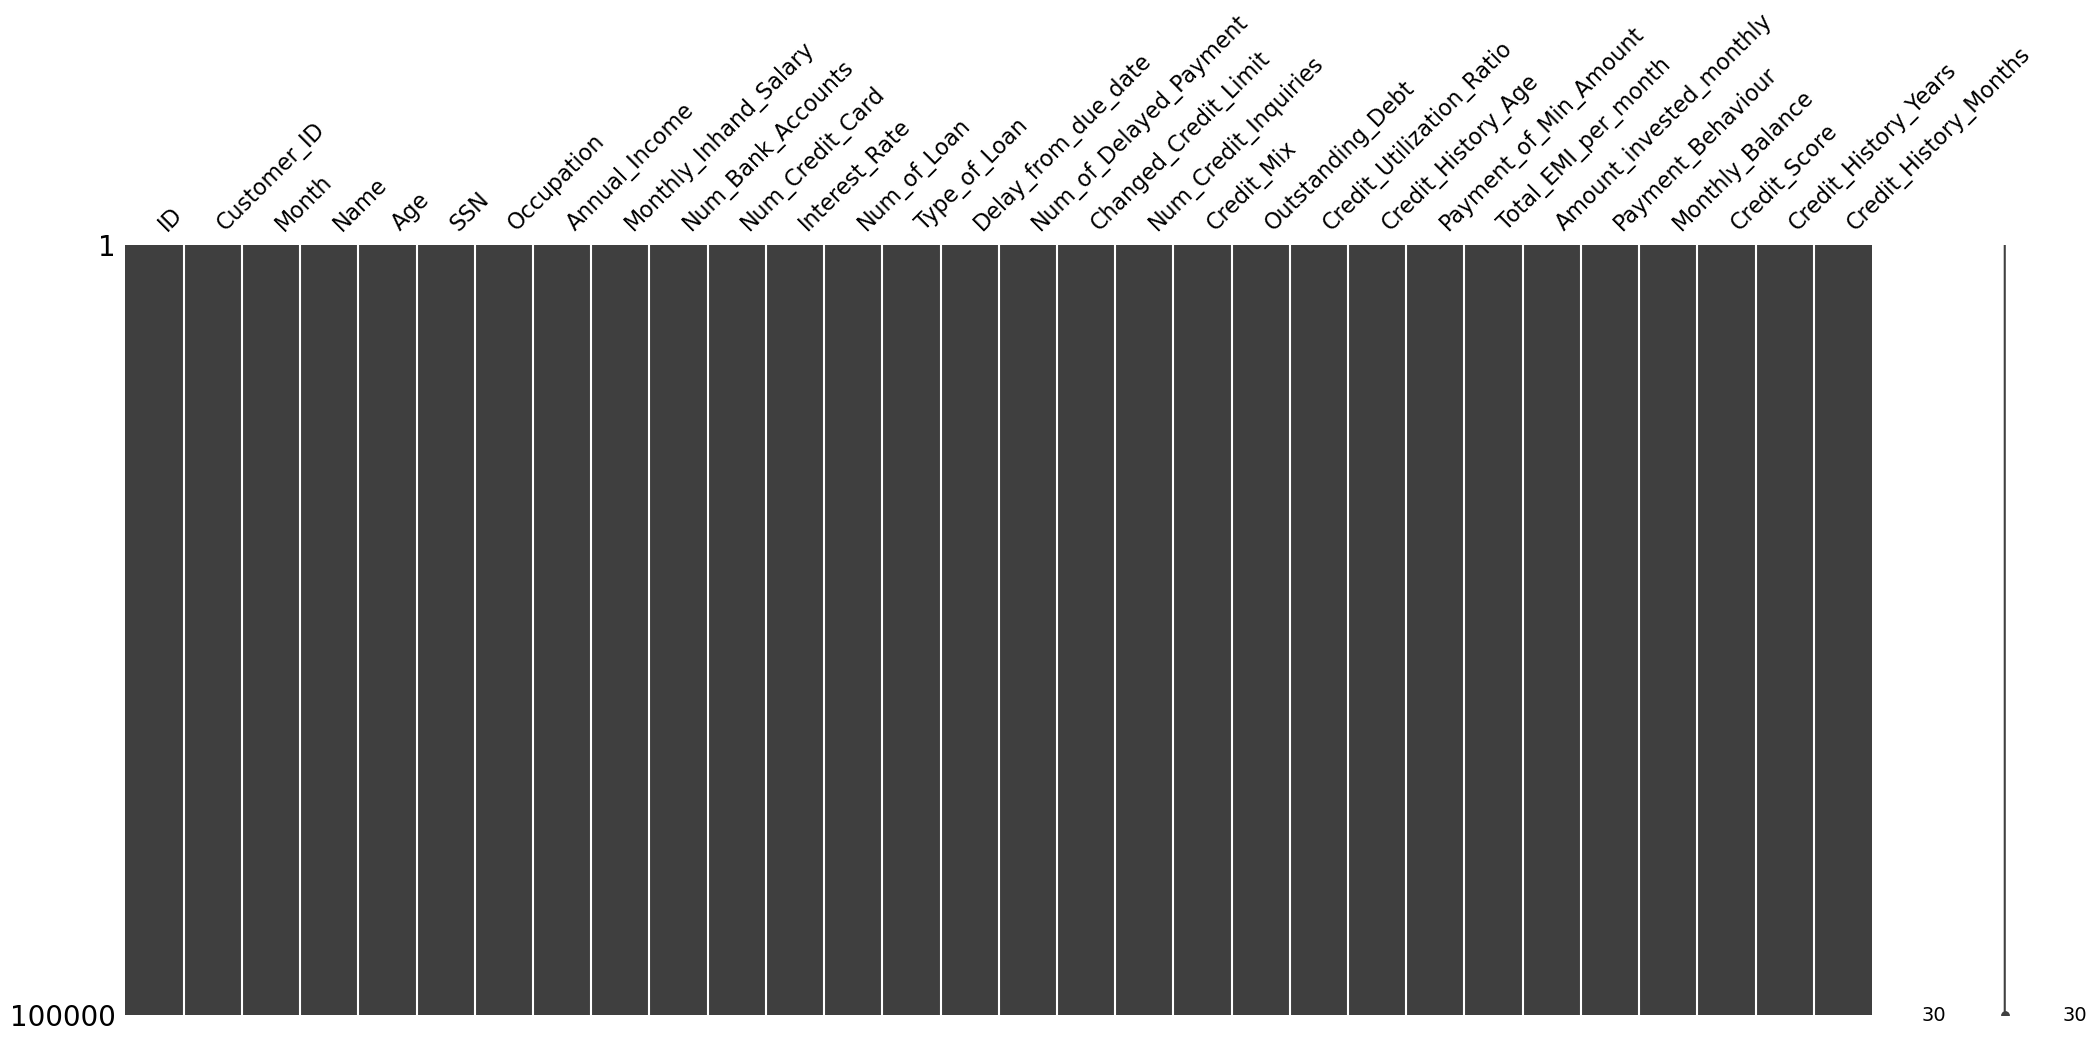

In [39]:
import missingno as msno
msno.matrix(train_imputed)
#sns.set(style='whitegrid')

In [40]:
droped_columns=train_imputed[['ID','Customer_ID','Name','SSN']]

In [41]:
train_imputed.drop(columns=['ID','Customer_ID','Name','SSN'],inplace=True)

In [42]:
train_imputed

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,3.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128.0,3.0,7.0,11.27,4.0,3.0,809.98,26.822620,180.0,1.0,49.574949,80.415295,2.0,312.494089,0.0,22.0,1.0
1,2.0,23.0,12.0,19114.12,1530.815000,3.0,4.0,3.0,4.0,128.0,-1.0,6.0,11.27,4.0,1.0,809.98,31.944960,404.0,1.0,49.574949,118.280222,3.0,284.629162,0.0,0.0,0.0
2,6.0,23.0,12.0,19114.12,1530.815000,3.0,4.0,3.0,4.0,128.0,3.0,7.0,9.87,4.0,1.0,809.98,28.609352,184.0,1.0,49.574949,81.699521,4.0,331.209863,0.0,22.0,3.0
3,0.0,23.0,12.0,19114.12,1530.815000,3.0,4.0,3.0,4.0,128.0,5.0,4.0,6.27,4.0,1.0,809.98,31.377862,185.0,1.0,49.574949,199.458074,5.0,223.451310,0.0,22.0,4.0
4,7.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128.0,6.0,6.0,11.27,4.0,1.0,809.98,24.797347,186.0,1.0,49.574949,41.420153,1.0,341.489231,0.0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,23.0,7.0,11.50,3.0,3.0,502.38,34.663572,307.0,1.0,35.104023,60.971333,0.0,479.866228,1.0,31.0,6.0
99996,7.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,18.0,7.0,11.50,3.0,3.0,502.38,40.565631,308.0,1.0,35.104023,54.185950,1.0,496.651610,1.0,31.0,7.0
99997,5.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,683.0,27.0,6.0,11.50,3.0,1.0,502.38,41.255522,309.0,1.0,35.104023,24.028477,0.0,516.809083,1.0,31.0,8.0
99998,4.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,20.0,8.6,11.50,3.0,1.0,502.38,33.638208,310.0,1.0,35.104023,251.672582,3.0,319.164979,2.0,31.0,9.0


### Now lets learn more about the given data plotting certain plots which gives us the idea about how independent features impacting the Credit score

In [43]:
train_imputed['Month_name']=train1['Month']
train_imputed['Name1']=train1['Name']
train_imputed['Occupation1']=train1['Occupation']
train_imputed['Credit_Score1']=train1['Credit_Score']
train_imputed['Type_of_Loan1']=train1['Type_of_Loan']

# Distribution of Numerical columns

In [44]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  float64
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  float64
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

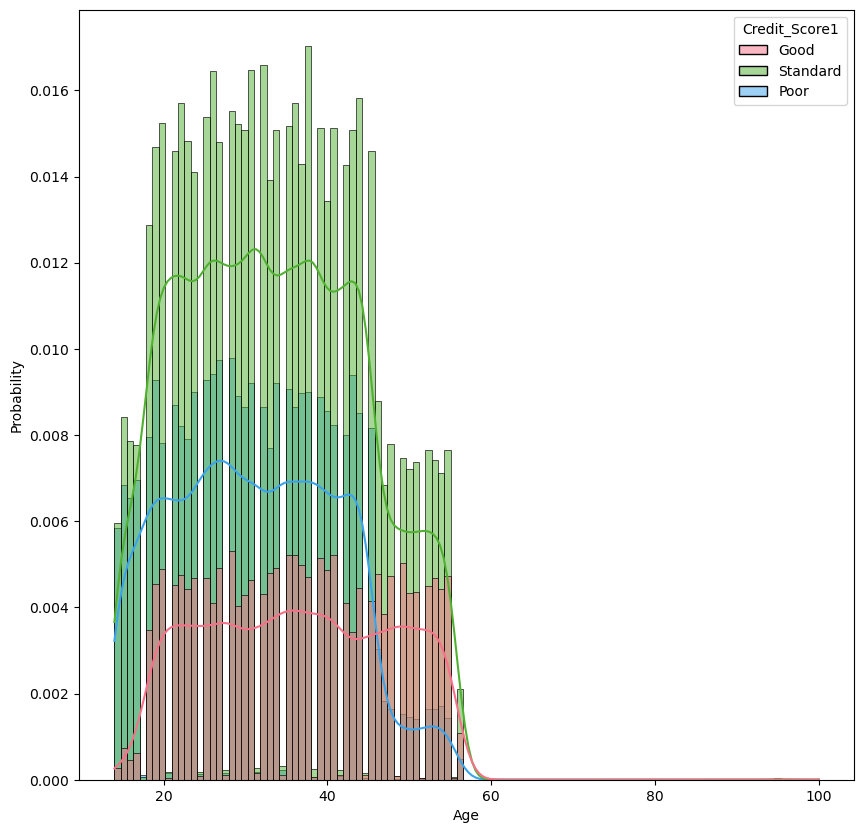

In [45]:
plt.figure(figsize = (10,10))
sns.histplot(data = train_imputed, x = 'Age', hue = 'Credit_Score1', kde = True, stat = 'probability', palette = 'husl')
plt.show()

- Most no of customers age between 20 to 50 have got standard Credit score

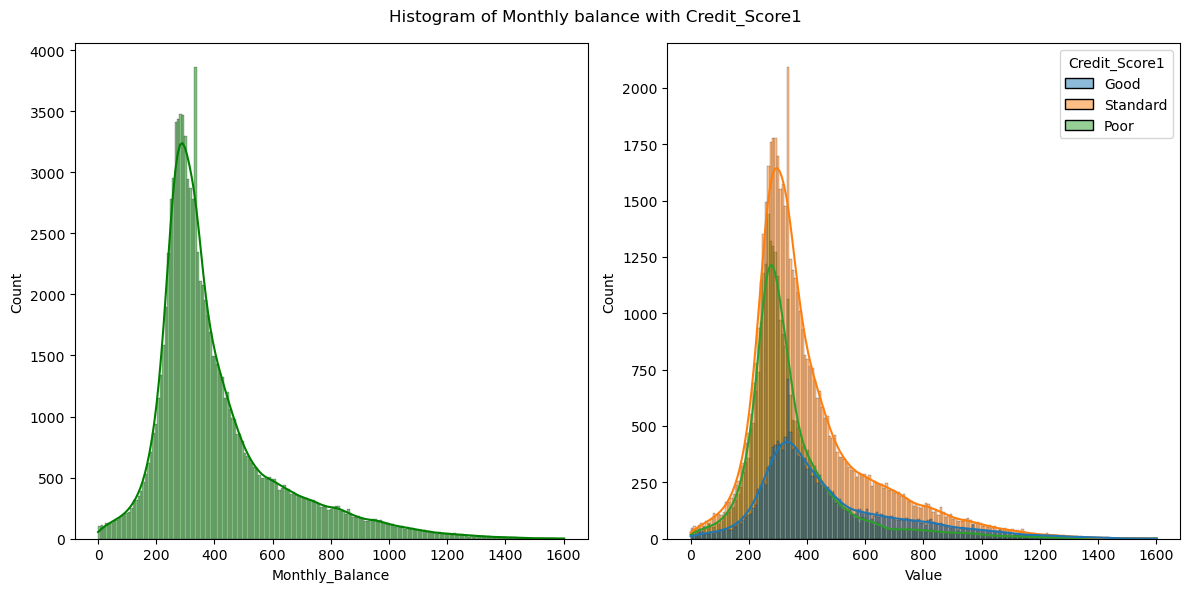

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(121)
sns.histplot(data=train_imputed, x='Monthly_Balance', kde=True, color='g')

plt.subplot(122)
sns.histplot(data=train_imputed, x='Monthly_Balance', kde=True, hue='Credit_Score1')

plt.suptitle('Histogram of Monthly balance with Credit_Score1')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

- Those who tends to maintain the balance between 200-400 got poor Credit score
- Those who tends to maintain the balance between 400-800 got Standard Credit score
- Those who tends to maintain the balance between 200-600 got good Credit score

In [47]:
train_imputed['Amount_invested_monthly'].mask(train_imputed['Amount_invested_monthly']==10000,np.median(train_imputed['Amount_invested_monthly']),inplace=True)

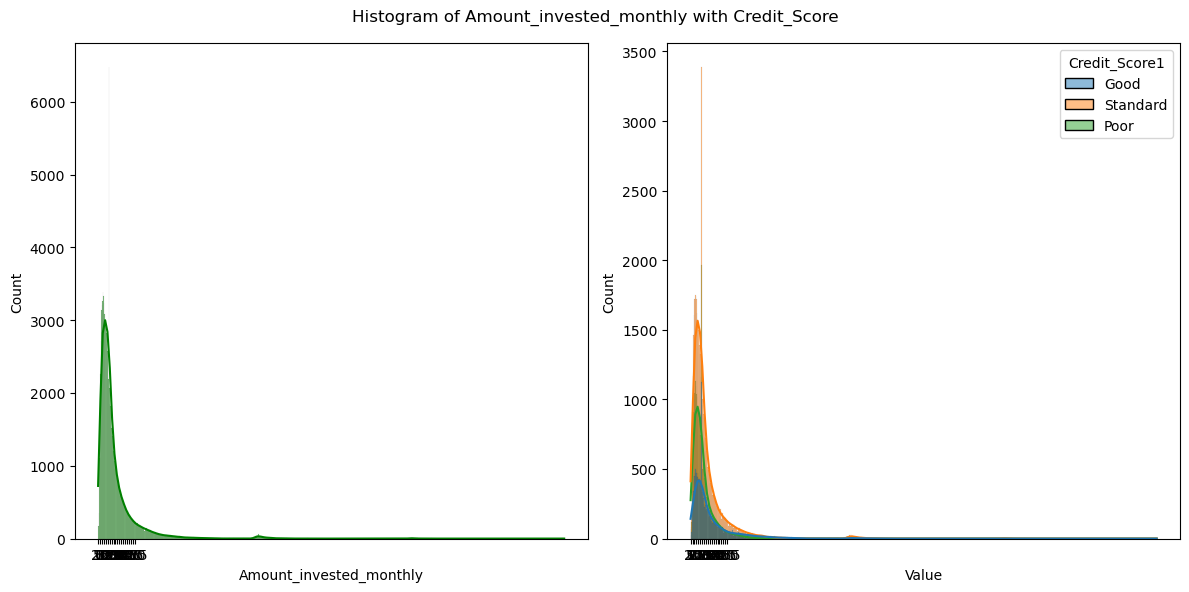

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(121)
sns.histplot(data=train_imputed, x='Amount_invested_monthly', kde=True, color='g')
plt.xticks(np.arange(0, 500, 25))
plt.subplot(122)
sns.histplot(data=train_imputed, x='Amount_invested_monthly', kde=True, hue='Credit_Score1')
plt.xticks(np.arange(0, 500, 25))
plt.suptitle('Histogram of Amount_invested_monthly with Credit_Score')
plt.xlabel('Value')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [49]:
train_imputed.loc[train_imputed['Credit_Score1']=='Good','Amount_invested_monthly'].mean()

269.37304464839474

In [50]:
train_imputed.loc[train_imputed['Credit_Score1']=='Standard','Amount_invested_monthly'].mean()

211.53771889418172

In [51]:
train_imputed.loc[train_imputed['Credit_Score1']=='Poor','Amount_invested_monthly'].mean()

178.48258595120984

- Those who tend to maintain average balance around 691 they got Good Credit Score
- Those who tend to maintain average balance around 631 they got Standard Credit Score
- Those who tend to maintain average balance around 613 they got Bad Credit Score

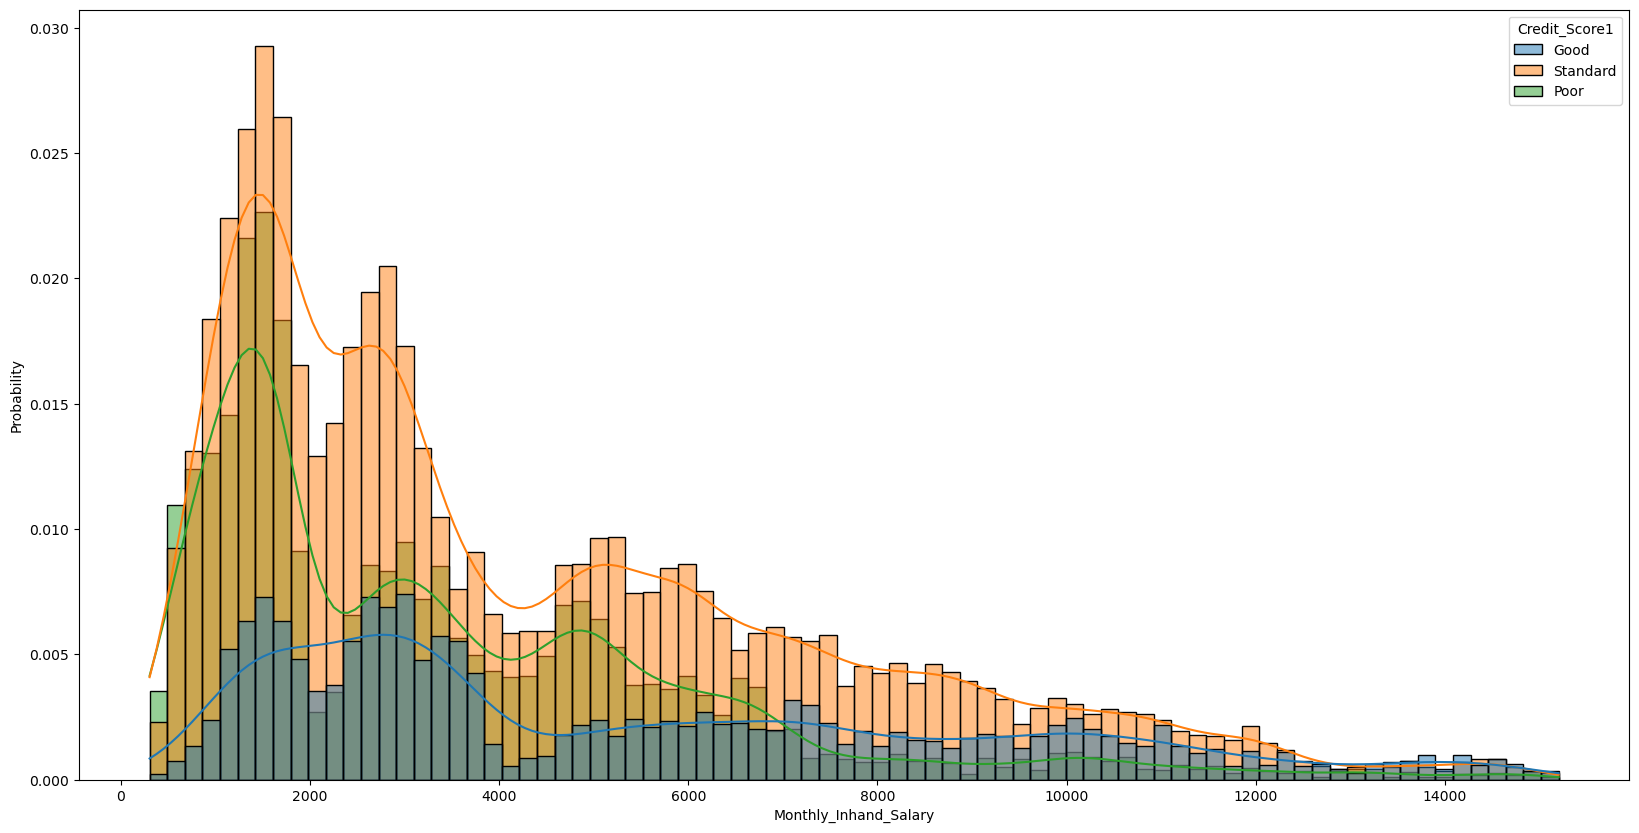

In [52]:
plt.figure(figsize = (20,10))
sns.histplot(data = train_imputed, x = 'Monthly_Inhand_Salary', kde = True, hue = 'Credit_Score1', stat = 'probability')
plt.show()

- most customers are tend to have high probability getting Standard credit score whose monthly salary ranging between 1500 and 3500

In [53]:
train_imputed.loc[train_imputed['Credit_Score1']=='Good','Monthly_Inhand_Salary'].mean()

5398.437462090938

In [54]:
train_imputed.loc[train_imputed['Credit_Score1']=='Poor','Monthly_Inhand_Salary'].mean()

3383.593842420254

In [55]:
train_imputed.loc[train_imputed['Credit_Score1']=='Standard','Monthly_Inhand_Salary'].mean()

4240.533404941563

- Those who tend to earn average salary around 5398.43 they got Good Credit Score
- Those who tend to earn average salary around 3383.59 they got Standard Credit Score
- Those who tend to earn average salary around 4240.53 they got Bad Credit Score

In [56]:
train_imputed.loc[train_imputed['Credit_Score1']=='Good','Num_of_Delayed_Payment'].mean()

25.883138882656482

In [57]:
train_imputed.loc[train_imputed['Credit_Score1']=='Poor','Num_of_Delayed_Payment'].mean()

32.39895165183804

In [58]:
train_imputed.loc[train_imputed['Credit_Score1']=='Standard','Num_of_Delayed_Payment'].mean()

31.71663218866368

- Customers who had done no of delayed paymenst 26 got good credit score
- Customers who had done no of delayed paymenst around 32 got Standard and poor credit score

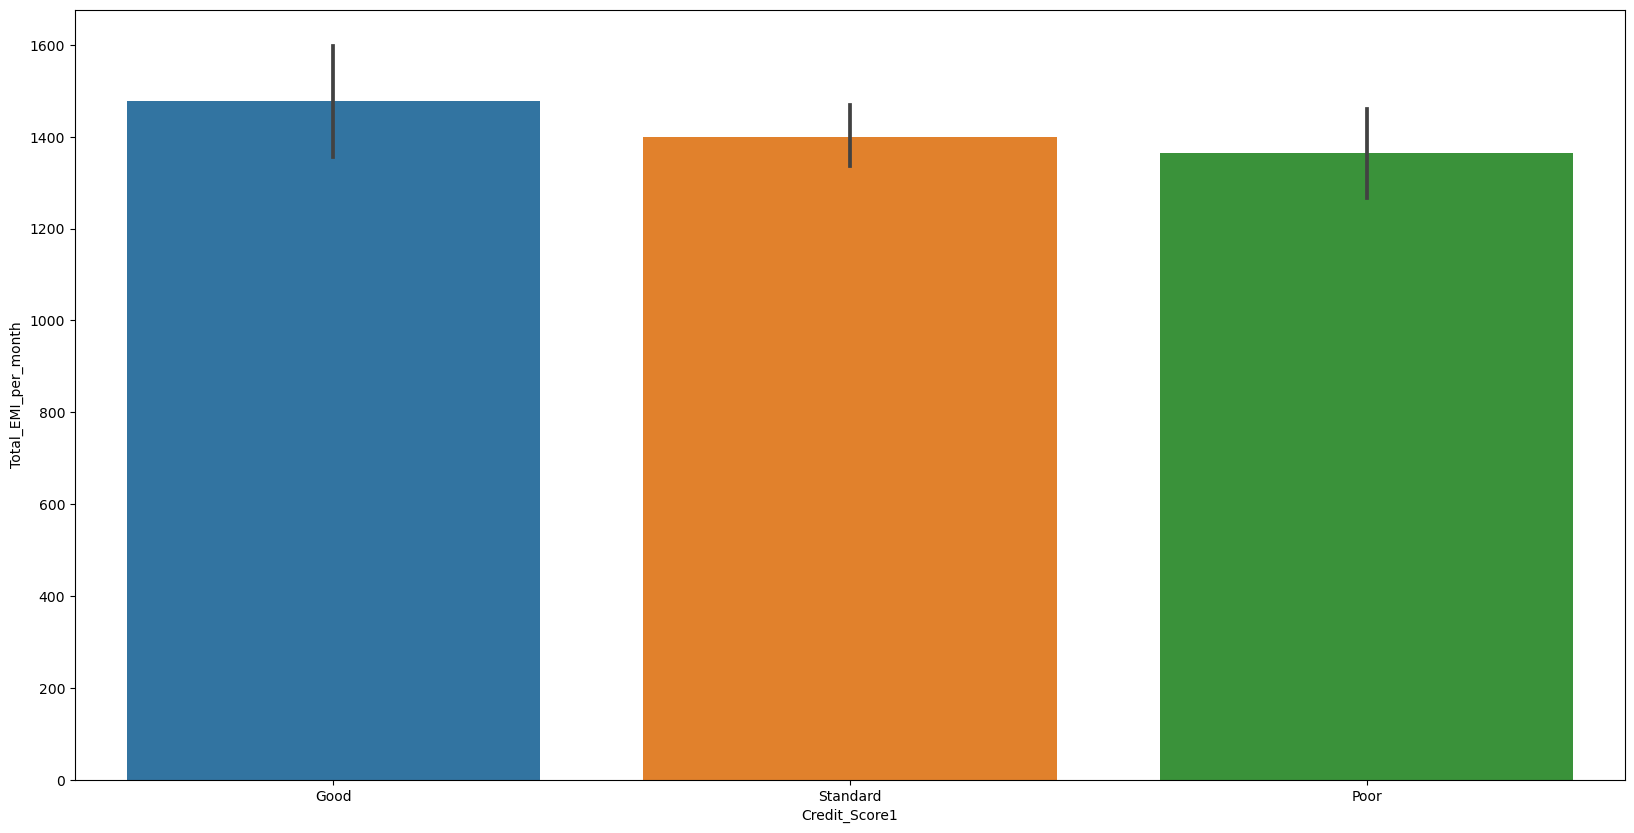

In [59]:
plt.figure(figsize = (20,10))
sns.barplot(data = train_imputed,x = 'Credit_Score1',y = 'Total_EMI_per_month' )
plt.show()

- Those customers who had higher emi per month tends to have good credit score 

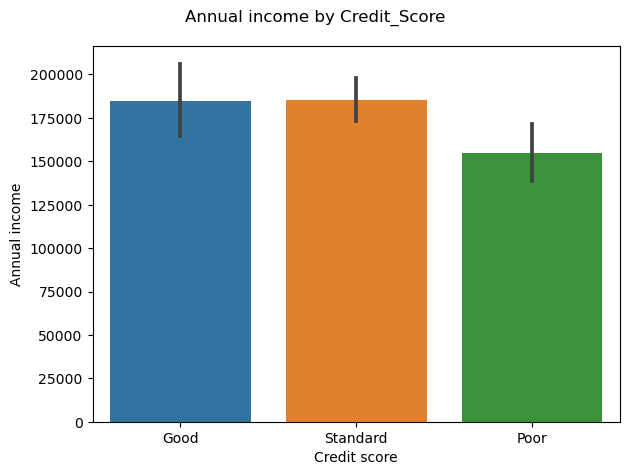

In [60]:
sns.barplot(data=train_imputed, x='Credit_Score1',y='Annual_Income')

plt.suptitle('Annual income by Credit_Score')
plt.xlabel('Credit score')
plt.ylabel('Annual income')

plt.tight_layout()

plt.show()

- Those customers who had the annual income  more than the 175000 tends to have good and standard Credit score
- Those customers who had the annual income  less than the 175000 tends to have good and standard Credit score

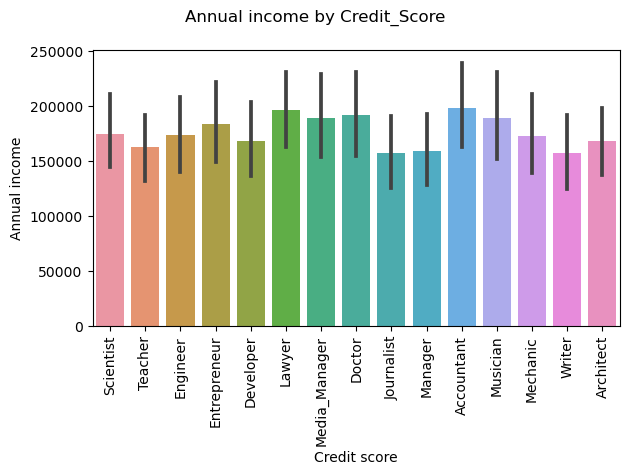

In [61]:
sns.barplot(data=train_imputed, x='Occupation1',y='Annual_Income')

plt.suptitle('Annual income by Credit_Score')
plt.xticks(rotation=90)
plt.xlabel('Credit score')
plt.ylabel('Annual income')

plt.tight_layout()

plt.show()

- Lawyers,Accountant,media manager,doctor,musician tends to earn more annually compare to others

In [62]:
# Lineplot

In [64]:
train_imputed.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_History_Years', 'Credit_History_Months',
       'Month_name', 'Name1', 'Occupation1', 'Credit_Score1', 'Type_of_Loan1'],
      dtype='object')

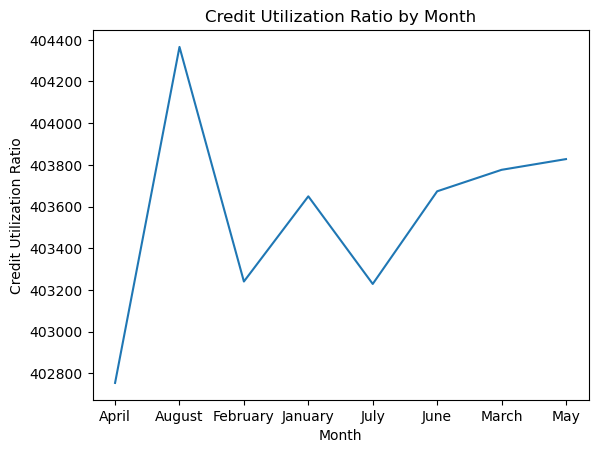

In [65]:
# group data by month
monthly_data = train_imputed.groupby('Month_name').sum()

# create line chart
plt.plot(monthly_data.index, monthly_data['Credit_Utilization_Ratio'])
plt.title('Credit Utilization Ratio by Month')
plt.xlabel('Month')
plt.ylabel('Credit Utilization Ratio')
plt.show()

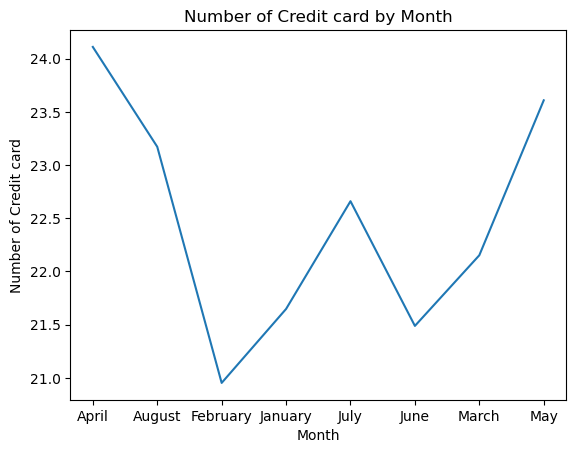

In [66]:
monthly_data = train_imputed.groupby('Month_name').mean()
plt.plot(monthly_data.index, monthly_data['Num_Credit_Card'])
plt.title('Number of Credit card by Month')
plt.xlabel('Month')
plt.ylabel('Number of Credit card')
plt.show()

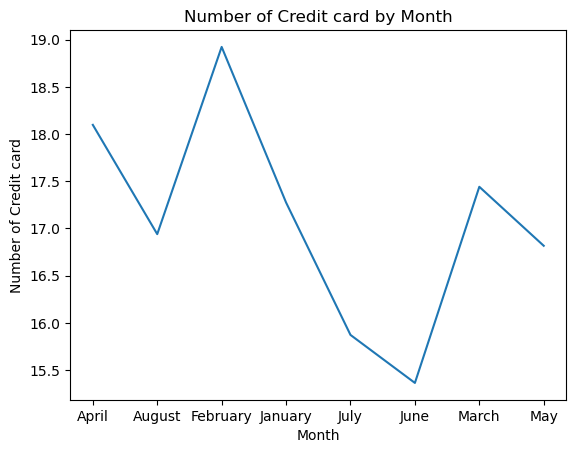

In [67]:
monthly_data = train_imputed.groupby('Month_name').mean()
plt.plot(monthly_data.index, monthly_data['Num_Bank_Accounts'])
plt.title('Number of Credit card by Month')
plt.xlabel('Month')
plt.ylabel('Number of Credit card')
plt.show()

- No of Credit card in a month February is 19 which is highest compare to other months

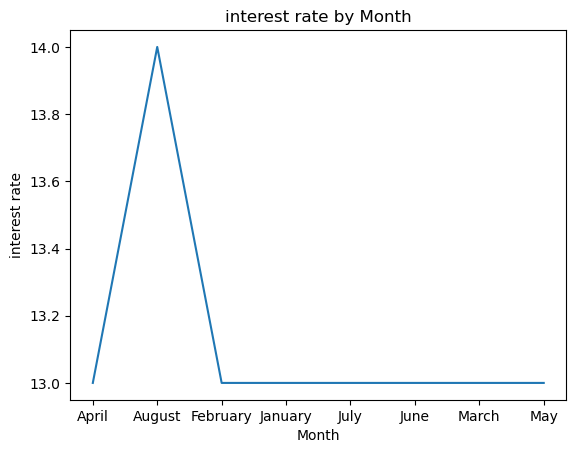

In [68]:
monthly_data = train_imputed.groupby('Month_name').median()
plt.plot(monthly_data.index, monthly_data['Interest_Rate'])
plt.title('interest rate by Month')
plt.xlabel('Month')
plt.ylabel('interest rate')
plt.show()

- Interest rate in a month of august is very high compare to other months

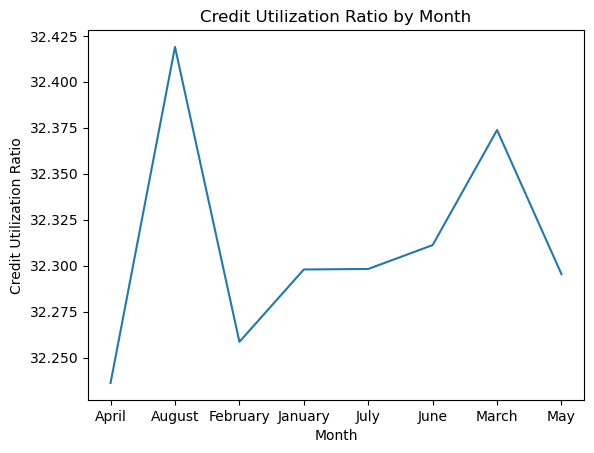

In [69]:
plt.plot(monthly_data.index, monthly_data['Credit_Utilization_Ratio'])
plt.title('Credit Utilization Ratio by Month')
plt.xlabel('Month')
plt.ylabel('Credit Utilization Ratio')
plt.show()

- Credit utilization ratio in a month august is very high,might suggest that the Customers are spending or utilizing credit limit at highest

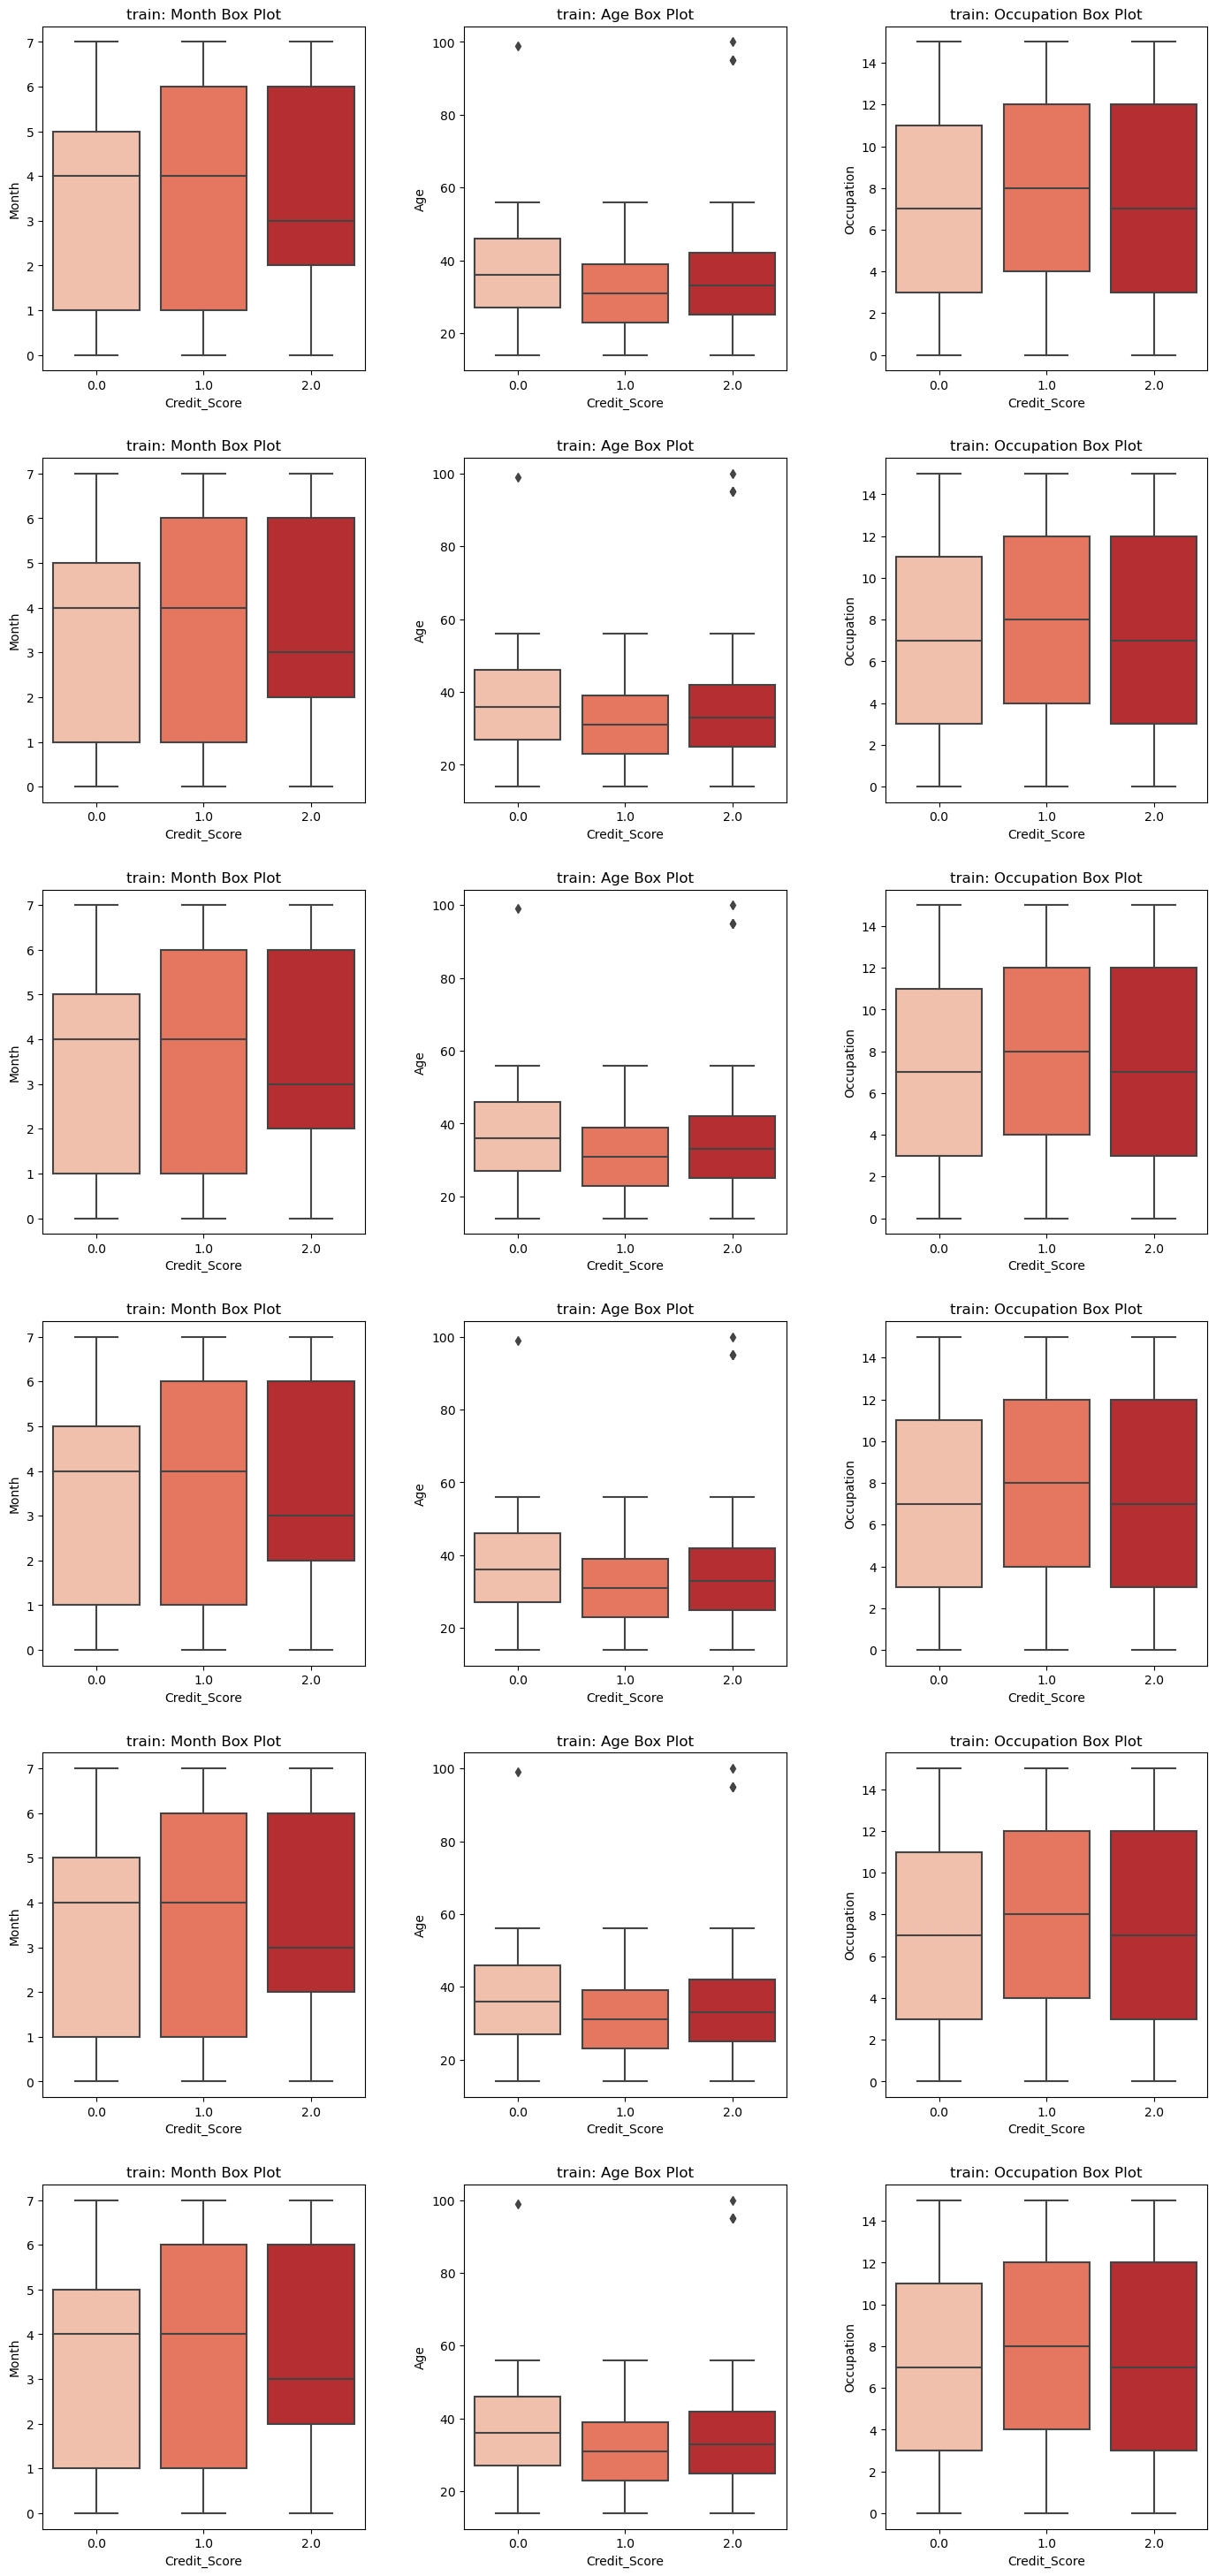

In [70]:
# start of moving parameter for the subplot positions
fig, axes = plt.subplots(6, 3, figsize = (15, 30))
fig.tight_layout(pad = 5)
setstart = 0
setstop = 3
row = 0
cols = [0, 1, 2]

# plotting the box plots
while row < 6: 
    for feature, col in zip(train_imputed[setstart:setstop], cols):
        sns.boxplot(x = train_imputed['Credit_Score'], 
                    y = train_imputed[feature], 
                    ax = axes[row, col], 
                    palette = 'Reds').set(title = 'train: ' + feature + ' Box Plot')
    setstart = setstart + 3
    setstop = setstop + 3
    row = row + 1
plt.show()

In [71]:
cat_col=['Month_name','Occupation1','Credit_Score1','Credit_Mix1','Payment_of_Min_Amount1','Payment_Behaviour1']

In [72]:
train_imputed['Credit_Mix1']=train1['Credit_Mix']
train_imputed['Payment_of_Min_Amount1']=train1['Payment_of_Min_Amount']
train_imputed['Payment_Behaviour1']=train1['Payment_Behaviour']

In [73]:
train_imputed['Occupation1'].fillna('Lawyer',inplace=True)
train_imputed['Credit_Score1'].fillna('Standard',inplace=True)
train_imputed['Payment_of_Min_Amount1'].fillna('Yes',inplace=True)
train_imputed['Credit_Mix1'].fillna('Standard',inplace=True)
train_imputed['Payment_Behaviour1'].fillna('Low_spent_Small_value_payments',inplace=True)

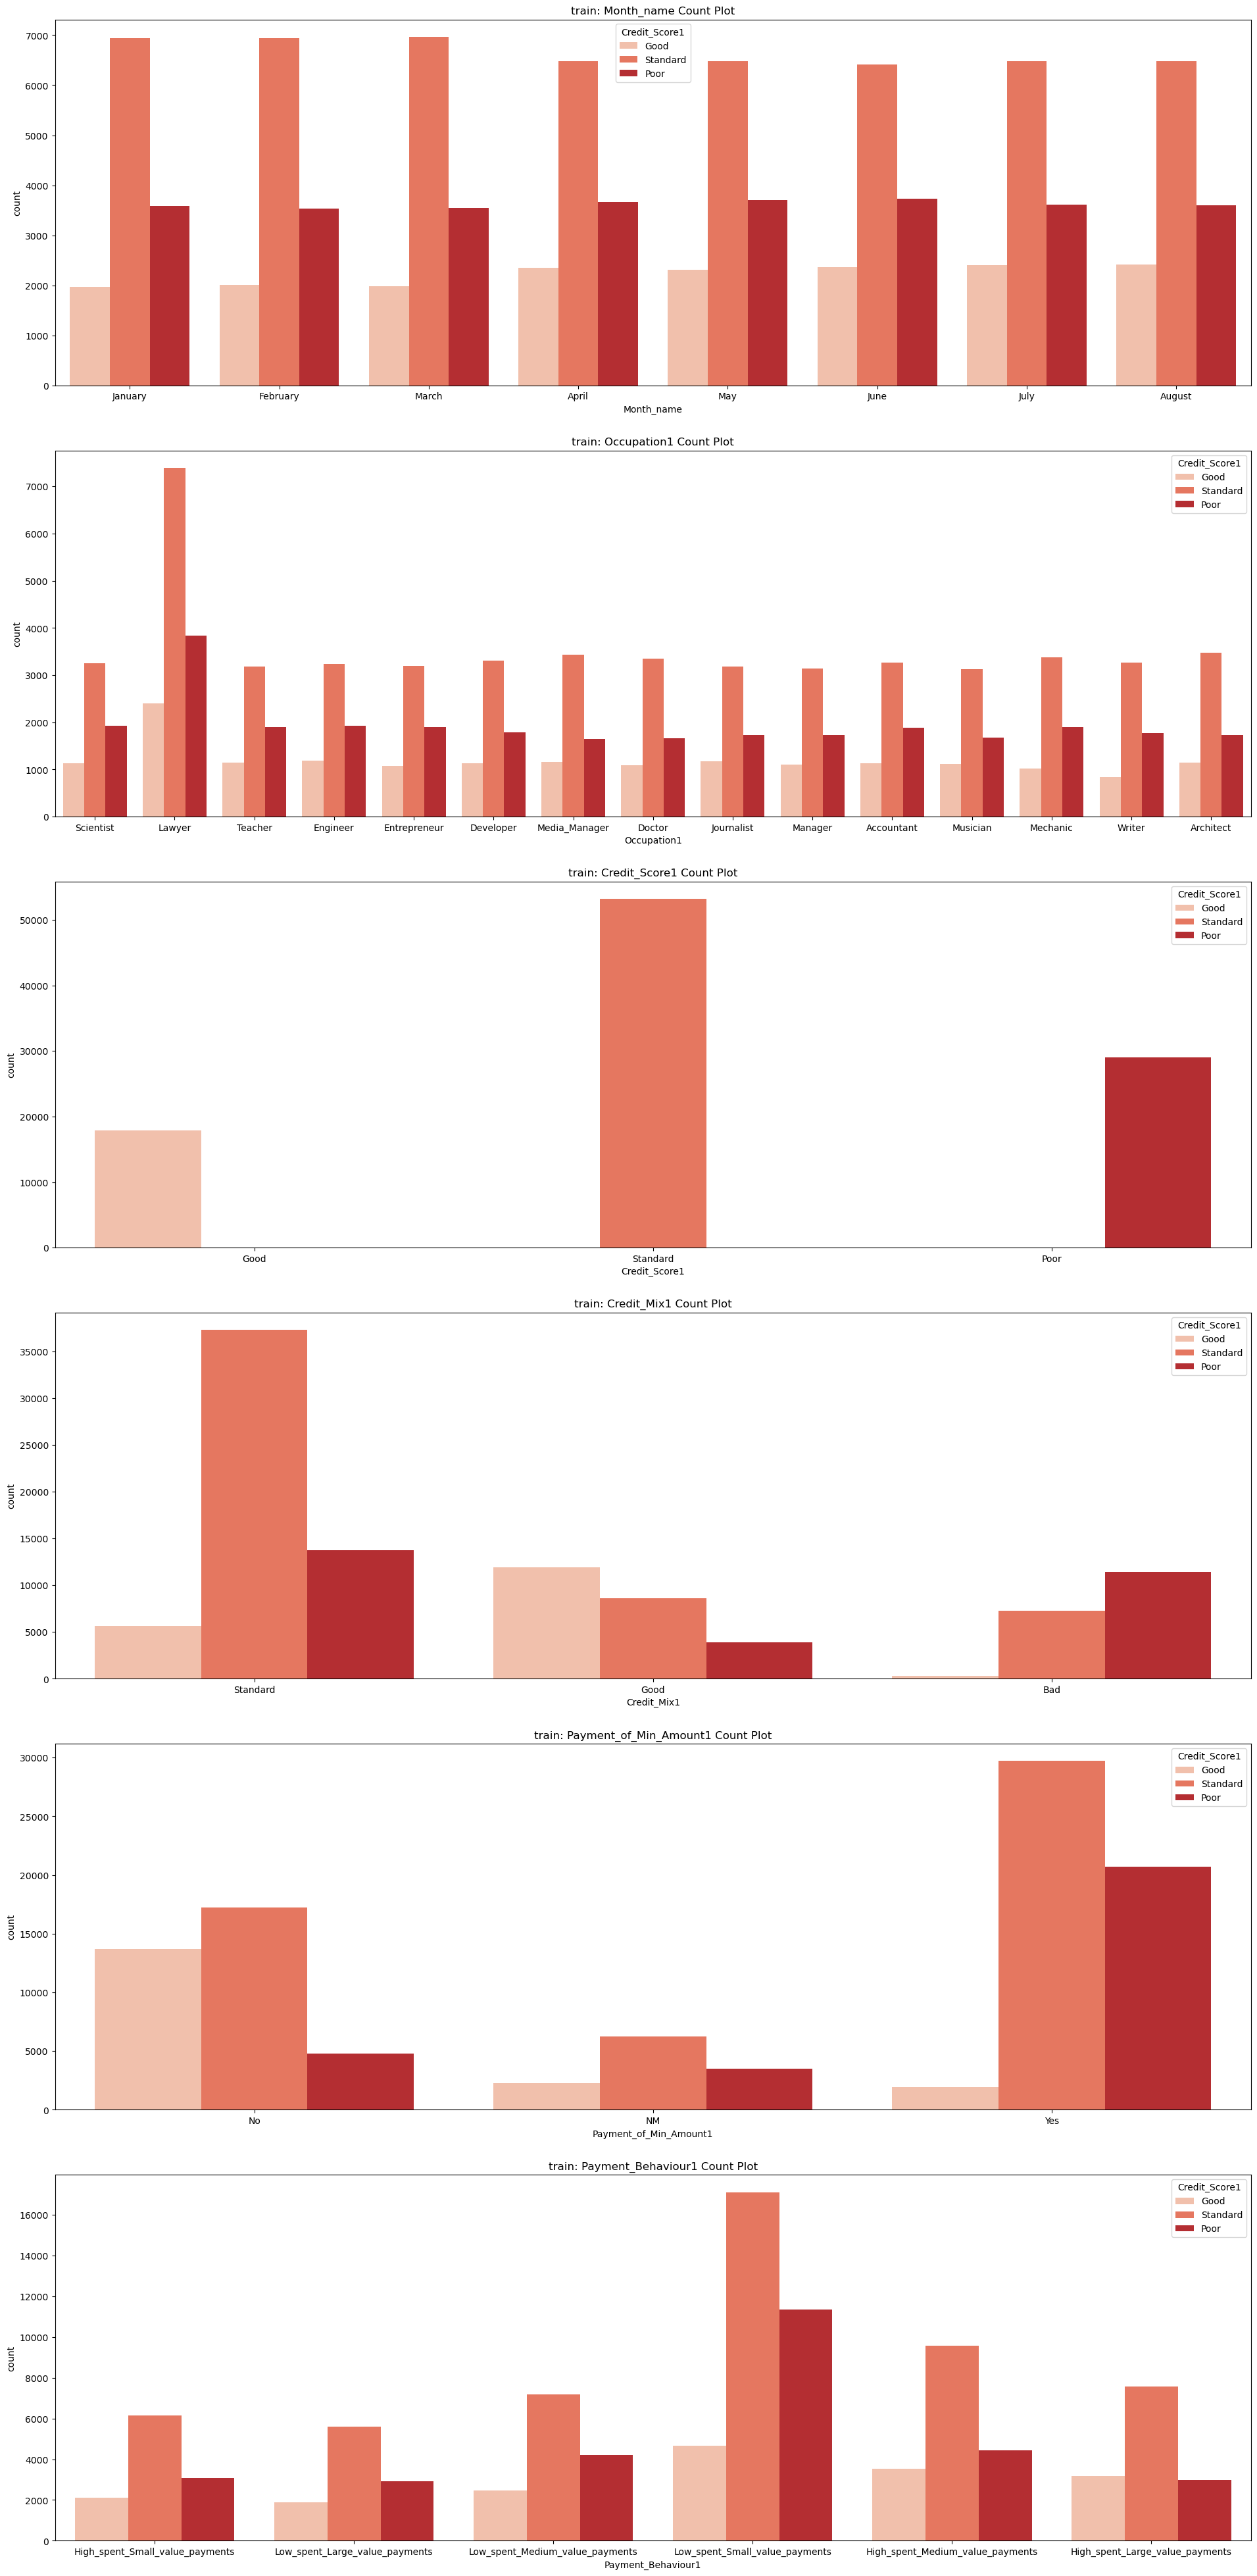

In [74]:
# creating figure
fig, axes = plt.subplots(6, 1 , figsize = (20, 40))
fig.tight_layout(pad = 5)

# plotting the count plots
row = 0
for feature in cat_col:
    sns.countplot(x = train_imputed[feature],
                 hue = train_imputed['Credit_Score1'],
                 ax = axes[row],
                 palette = 'Reds').set(title = 'train: ' + feature + ' Count Plot')
    row = row + 1

- Lawyers tends to have the Highest Standard,good,Bad Credit Score
- most no of customers who does low_spend_small_value_payments tends to have the most standard Credit score,Good Credit score,also a Poor credit score
- most no of customers who pays min amount tends to have the most standard Credit score,Good Credit score,also a Poor credit score

# Checking the percentage of outliers missing in each Attribute

In [75]:
for i in train_imputed.select_dtypes('number').columns:
    threshold=3
    upper=train_imputed[i].mean()+threshold*train_imputed[i].std()
    lower=train_imputed[i].mean()-threshold*train_imputed[i].std()
    outliers=len(train_imputed[(train_imputed[i]<lower) | (train_imputed[i]>upper)])
    pct_outliers=outliers/len(train_imputed)*100
    print(f"{i}:{round(pct_outliers,2)}%")

Month:0.0%
Age:0.01%
Occupation:0.0%
Annual_Income:0.83%
Monthly_Inhand_Salary:1.06%
Num_Bank_Accounts:1.05%
Num_Credit_Card:1.64%
Interest_Rate:1.5%
Num_of_Loan:0.42%
Type_of_Loan:0.0%
Delay_from_due_date:0.05%
Num_of_Delayed_Payment:0.7%
Changed_Credit_Limit:0.2%
Num_Credit_Inquiries:1.29%
Credit_Mix:0.0%
Outstanding_Debt:0.58%
Credit_Utilization_Ratio:0.02%
Credit_History_Age:0.0%
Payment_of_Min_Amount:0.0%
Total_EMI_per_month:2.15%
Amount_invested_monthly:1.57%
Payment_Behaviour:0.0%
Monthly_Balance:1.89%
Credit_Score:0.0%
Credit_History_Years:0.0%
Credit_History_Months:0.0%


# Treating the outliers using winsorization method(which replaces the outliers by max and min values with given limit)

In [76]:
from scipy.stats.mstats import winsorize

In [77]:
for column in train_imputed.select_dtypes(exclude='object').columns:
    # use the winsorize function from scipy.stats to winsorize each column
    train_imputed[column] = winsorize(train_imputed[column], limits=[0.1,0.2])

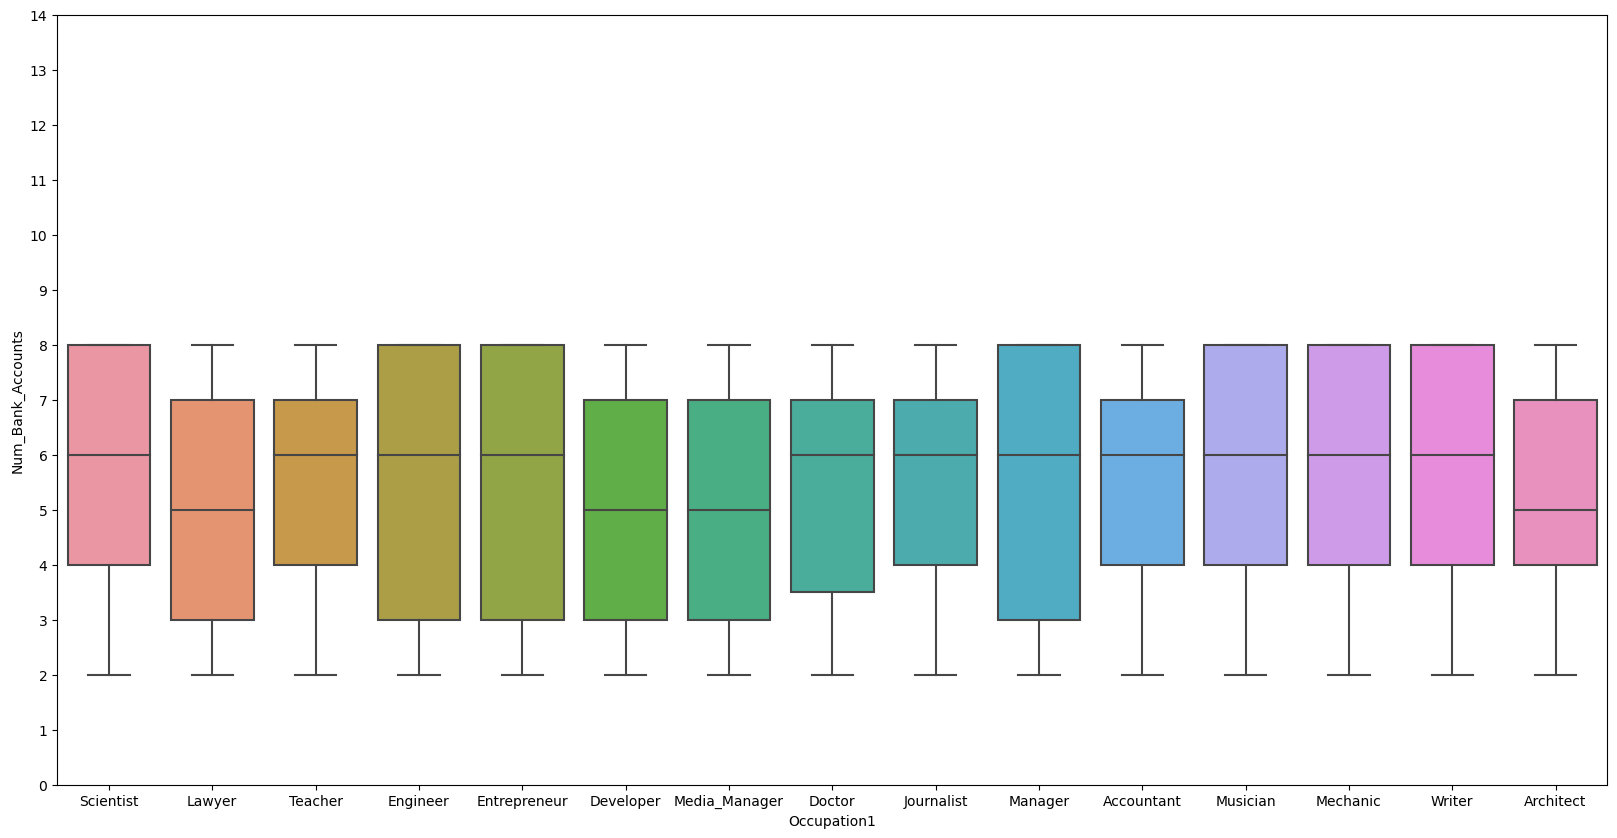

In [78]:
plt.figure(figsize = (20, 10), dpi = 100)
sns.boxplot(data = train_imputed, x = 'Occupation1', y = 'Num_Bank_Accounts')
plt.yticks(np.arange(0, 15))
plt.show()

# All the professionals tends have average bank accounts ranges from 5 to 6 which is pretty normal.

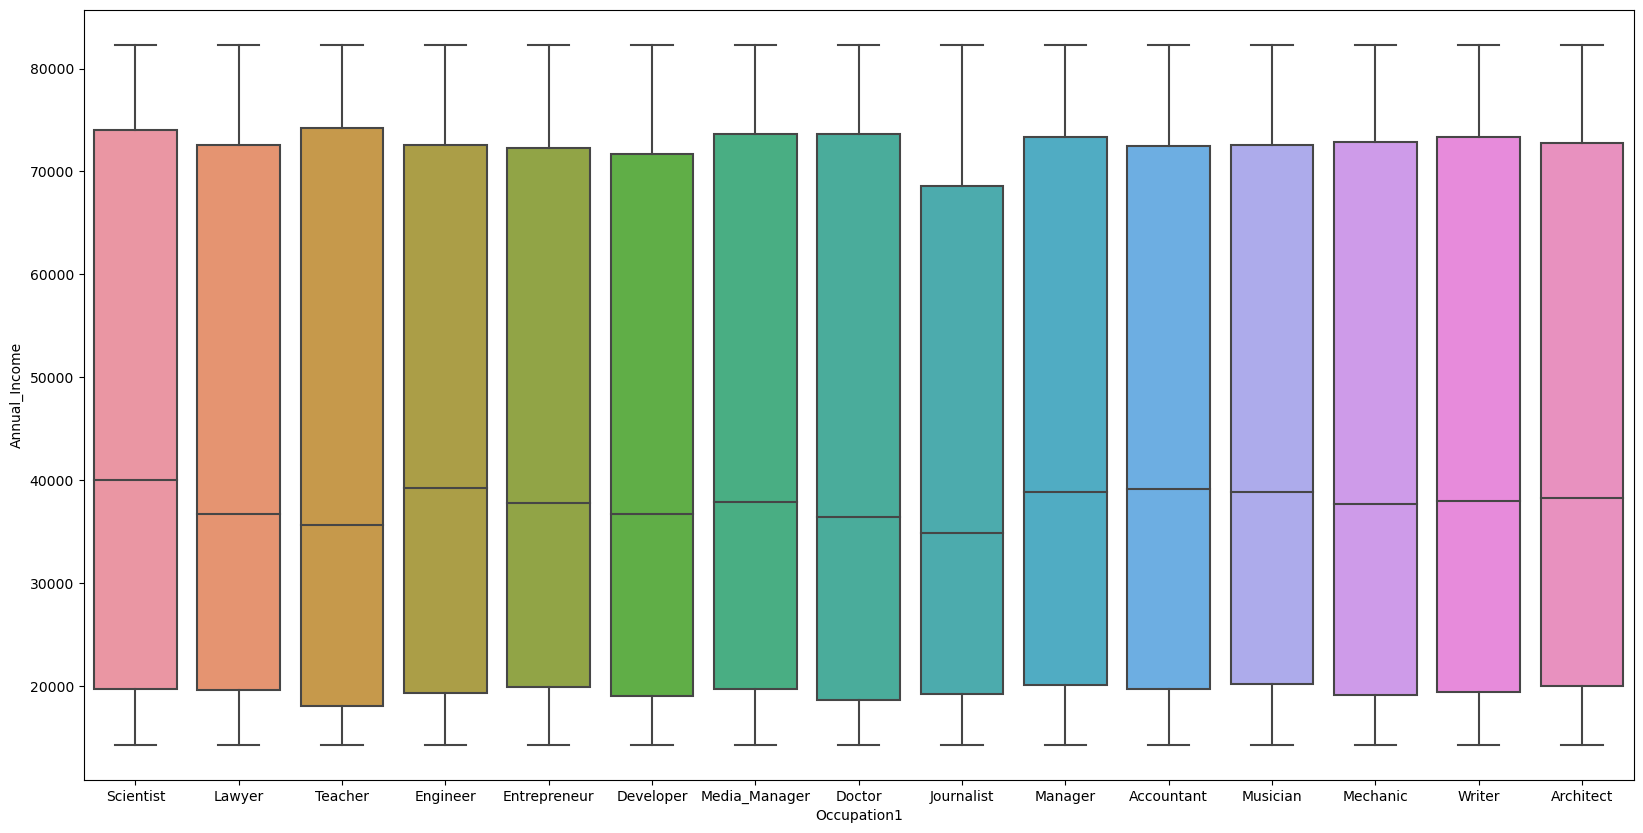

In [79]:
plt.figure(figsize = (20, 10), dpi = 100)
sns.boxplot(data = train_imputed, x = 'Occupation1', y = 'Annual_Income')
plt.show()

# The annual income is also quite similar for every occupation with the average being between 35000-40000. Also, there are a few outliers with respect to every occupation.

In [80]:
plt.figure(figsize = (30, 20), dpi = 200)
sns.factorplot(data = train_imputed, x = 'Occupation1', y = 'Annual_Income', hue = 'Credit_Score1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

<Figure size 6000x4000 with 0 Axes>

- Clearly people with every occupation having a average annual income of more than 65000 has a good credit score
- People having a average annual income 50000 has a standard credit score
- People having a average annual income of 40000 has a pood credit score

In [ ]:
### Distribution of Credit_Score for each Occupation

sns.factorplot('Credit_Score1', col = 'Occupation1', data = train_imputed, kind = 'count', col_wrap = 4)

- From the above barplot we can infer :
- People investing 70 on average from every occupation are more likely to have Good credit score.
- People investing 55 on average from every occupation are more likely to have Standard credit score.
- People investing 48 on average from every occupation are more likely to have Poor credit score.

<AxesSubplot:xlabel='Occupation1', ylabel='count'>

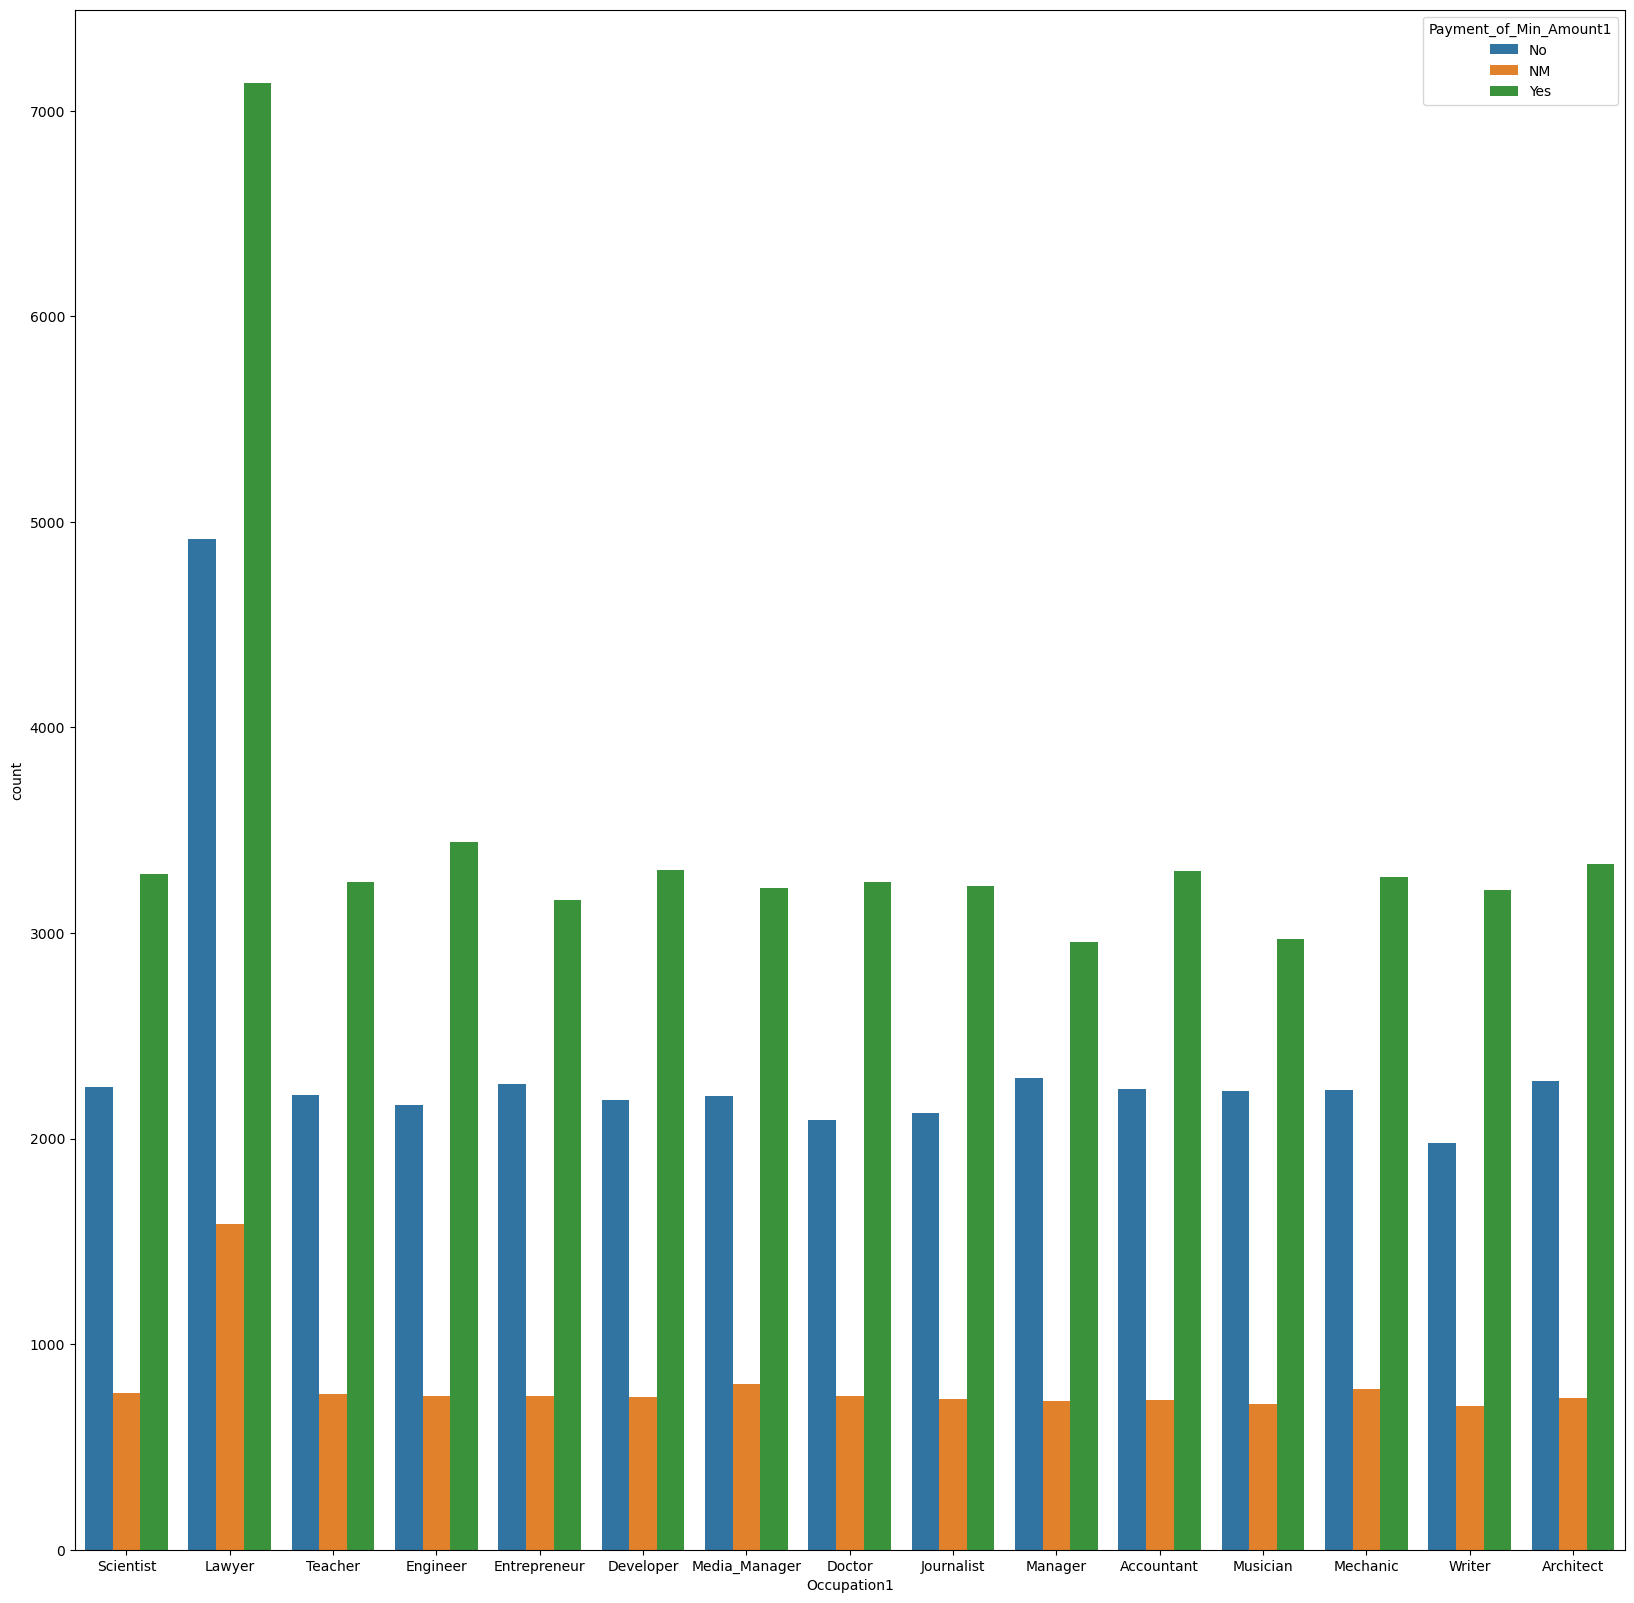

In [81]:
plt.figure(figsize = (20, 20))
sns.countplot(data = train_imputed, x = 'Occupation1', hue = 'Payment_of_Min_Amount1')

- So, people with every occupation have mostly paid their minimum amount which is pretty evident from the previous plot.
- Engineers and Lawyers are most likely to have paid the minimum amount

# Type of Loan

In [82]:
train_imputed['Type_of_Loan1'].fillna('Not Specified',inplace=True)

In [83]:
loan_type_dict = dict()
for value in train_imputed['Type_of_Loan1']:
    values = str(value).split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 51024,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

Text(0.5, 0, 'Type_of_Loan')

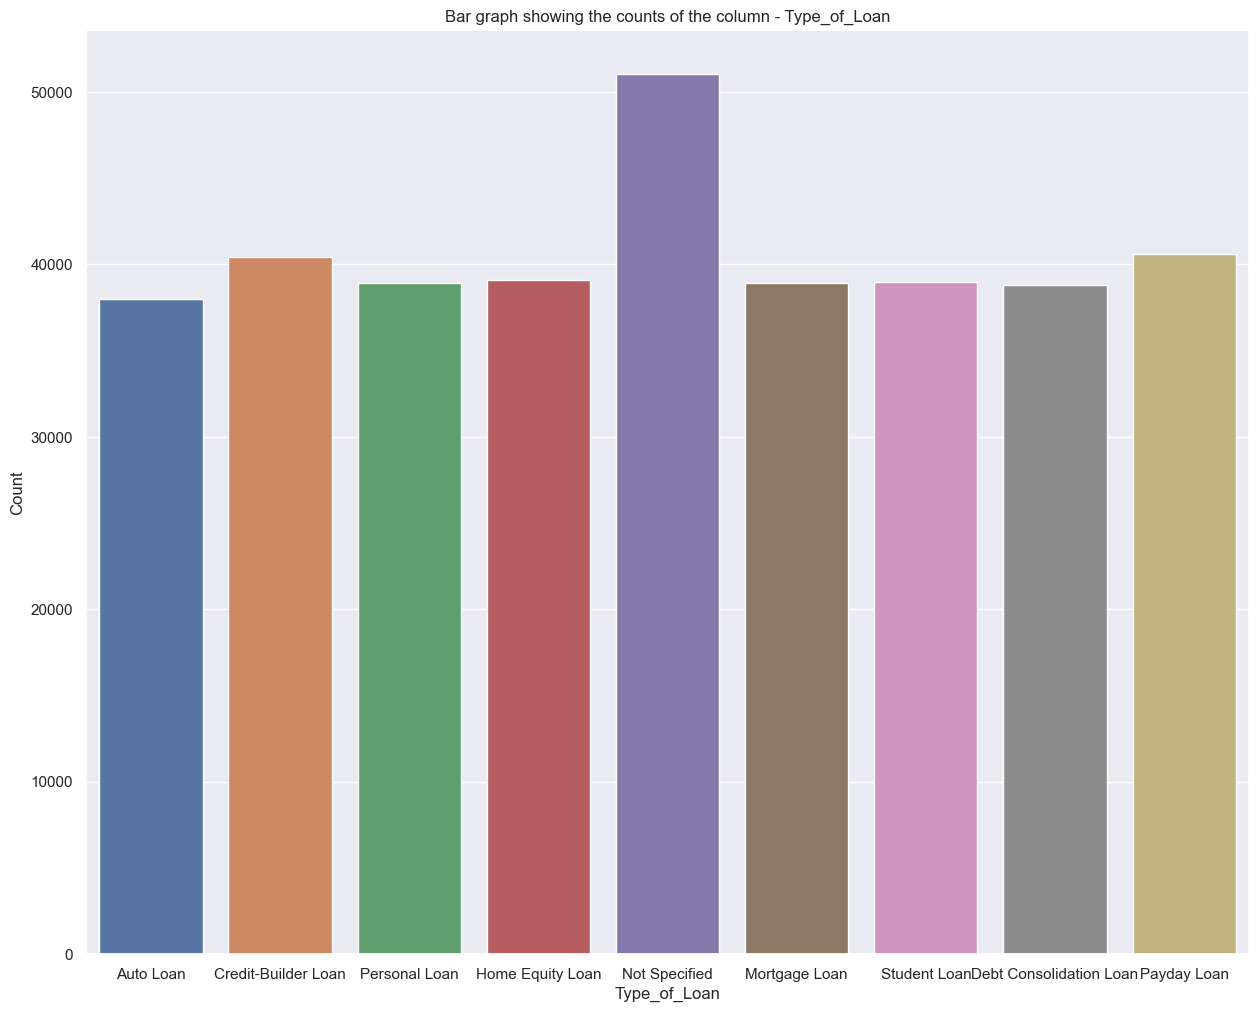

In [84]:
### Bar graph showing the counts of the column - Type_of_Loan

sns.set(rc = {'figure.figsize': (15, 12)})
sns.barplot(x=list(loan_type_dict.keys()), y=list(loan_type_dict.values()))
plt.title('Bar graph showing the counts of the column - Type_of_Loan')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Type_of_Loan', fontsize = 12)

-- From the above graph, we can see that the Payday Loans and Credit-Builder Loans are the highest occurrences of loans among all the other loans and also most of the loans are not specified which are the most occured

In [85]:
print(train_imputed['Credit_Score1'].unique())

['Good' 'Standard' 'Poor']


<AxesSubplot:xlabel='Credit_Score1', ylabel='count'>

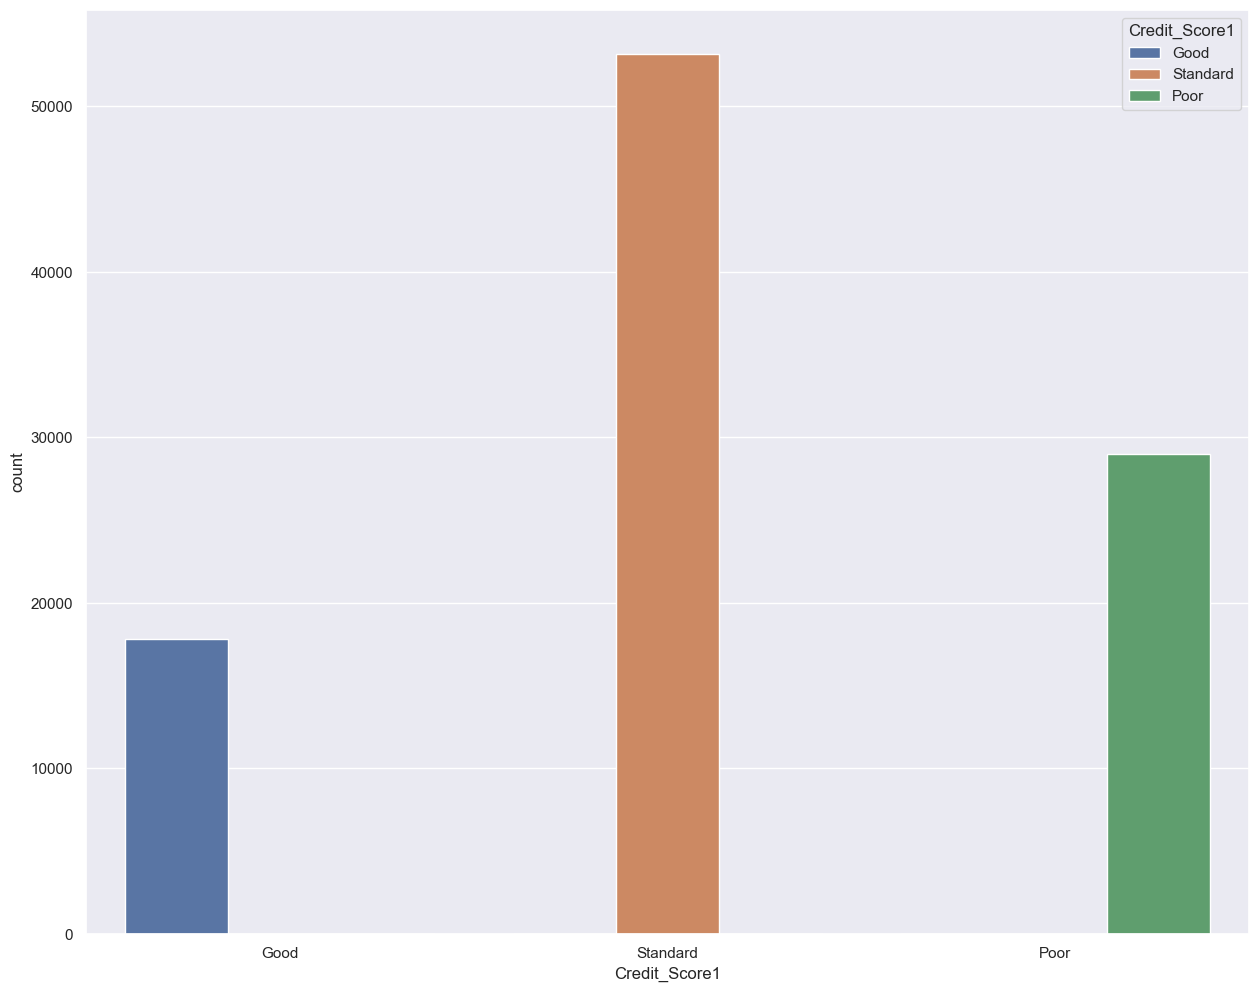

In [86]:
sns.countplot(data=train_imputed, x='Credit_Score1', hue='Credit_Score1')


# The given dataset is unbalanced,most of the datapoints fall under the Standard category

In [87]:
df=train_imputed.iloc[:,:26]

In [88]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,3.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,4.0,4.0,684.0,5.0,7.0,11.27,4.0,3.0,809.98,26.822620,180.0,1.0,49.574949,80.415295,2.0,312.494089,0.0,22.0,1.0
1,2.0,23.0,12.0,19114.12,1530.815000,3.0,4.0,4.0,4.0,684.0,5.0,6.0,11.27,4.0,1.0,809.98,31.944960,357.0,1.0,49.574949,118.280222,3.0,284.629162,0.0,1.0,0.0
2,6.0,23.0,12.0,19114.12,1530.815000,3.0,4.0,4.0,4.0,684.0,5.0,7.0,9.87,4.0,1.0,809.98,28.609352,184.0,1.0,49.574949,81.699521,4.0,331.209863,0.0,22.0,3.0
3,0.0,23.0,12.0,19114.12,1530.815000,3.0,4.0,4.0,4.0,684.0,5.0,4.4,6.27,4.0,1.0,809.98,31.377862,185.0,1.0,49.574949,199.458074,5.0,223.451310,0.0,22.0,4.0
4,6.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,4.0,4.0,684.0,6.0,6.0,11.27,4.0,1.0,809.98,25.345261,186.0,1.0,49.574949,44.600703,1.0,341.489231,0.0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,684.0,23.0,7.0,11.50,3.0,3.0,502.38,34.663572,307.0,1.0,35.104023,60.971333,0.0,479.866228,1.0,26.0,6.0
99996,6.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,684.0,18.0,7.0,11.50,3.0,3.0,502.38,37.317021,308.0,1.0,35.104023,54.185950,1.0,496.651610,1.0,26.0,7.0
99997,5.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,23.0,2.0,684.0,27.0,6.0,11.50,3.0,1.0,502.38,37.317021,309.0,1.0,35.104023,44.600703,0.0,516.809083,1.0,26.0,8.0
99998,4.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,684.0,20.0,8.6,11.50,3.0,1.0,502.38,33.638208,310.0,1.0,35.104023,251.672582,3.0,319.164979,2.0,26.0,9.0


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [90]:
df['Credit_Score1']=train_imputed['Credit_Score1']

In [91]:
x=df.drop(columns=['Credit_Score','Credit_Score1'])
y=df.Credit_Score1

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [93]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [94]:
# Lets build a base model since before appling sampling our dataset 

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [96]:
log_clf=LogisticRegression(multi_class='ovr').fit(X_train,y_train)
y_pred=log_clf.predict(X_test)
print('Training_accuracy:{}'.format(log_clf.score(X_train,y_train)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

Training_accuracy:0.6315142857142857
Testing_accuracy:0.6258333333333334
              precision    recall  f1-score   support

        Good       0.53      0.40      0.45      5322
        Poor       0.63      0.58      0.60      8805
    Standard       0.65      0.73      0.68     15873

    accuracy                           0.63     30000
   macro avg       0.60      0.57      0.58     30000
weighted avg       0.62      0.63      0.62     30000



(<Figure size 600x400 with 2 Axes>, <AxesSubplot:>)

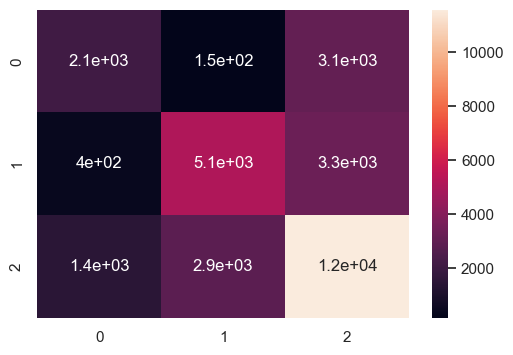

In [97]:
fig=plt.figure(figsize=(6,4))
conf_log=confusion_matrix(y_test,y_pred)
fig,sns.heatmap(conf_log,annot=True)

In [98]:
# Support vector machine

In [99]:
from sklearn.svm import SVC

In [100]:
svc_clf=SVC().fit(X_train,y_train)
y_pred=svc_clf.predict(X_test)
print('Training_accuracy:{}'.format(svc_clf.score(X_train,y_train)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

Training_accuracy:0.7180142857142857
Testing_accuracy:0.6951333333333334
              precision    recall  f1-score   support

        Good       0.56      0.64      0.60      5322
        Poor       0.74      0.62      0.67      8805
    Standard       0.73      0.75      0.74     15873

    accuracy                           0.70     30000
   macro avg       0.67      0.67      0.67     30000
weighted avg       0.70      0.70      0.70     30000



In [101]:
# knn

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn_clf=KNeighborsClassifier().fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)
print('Training_accuracy:{}'.format(knn_clf.score(X_train,y_train)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

Training_accuracy:0.7786142857142857
Testing_accuracy:0.6633333333333333
              precision    recall  f1-score   support

        Good       0.53      0.58      0.55      5322
        Poor       0.67      0.63      0.65      8805
    Standard       0.71      0.71      0.71     15873

    accuracy                           0.66     30000
   macro avg       0.64      0.64      0.64     30000
weighted avg       0.67      0.66      0.66     30000



In [104]:
# random forest 

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf_clf=RandomForestClassifier().fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
print('Training_accuracy:{}'.format(rf_clf.score(X_train,y_train)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

Training_accuracy:1.0
Testing_accuracy:0.7746666666666666
              precision    recall  f1-score   support

        Good       0.70      0.71      0.71      5322
        Poor       0.78      0.78      0.78      8805
    Standard       0.80      0.80      0.80     15873

    accuracy                           0.77     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.77      0.77      0.77     30000



### As we created four model we can see that out of all the model random forest gave us a 100% Training accuracy and 78% Testing accuracy which is a clearly a overfitting

# Feature selection

## Information gain

In [107]:
from sklearn.feature_selection import mutual_info_classif

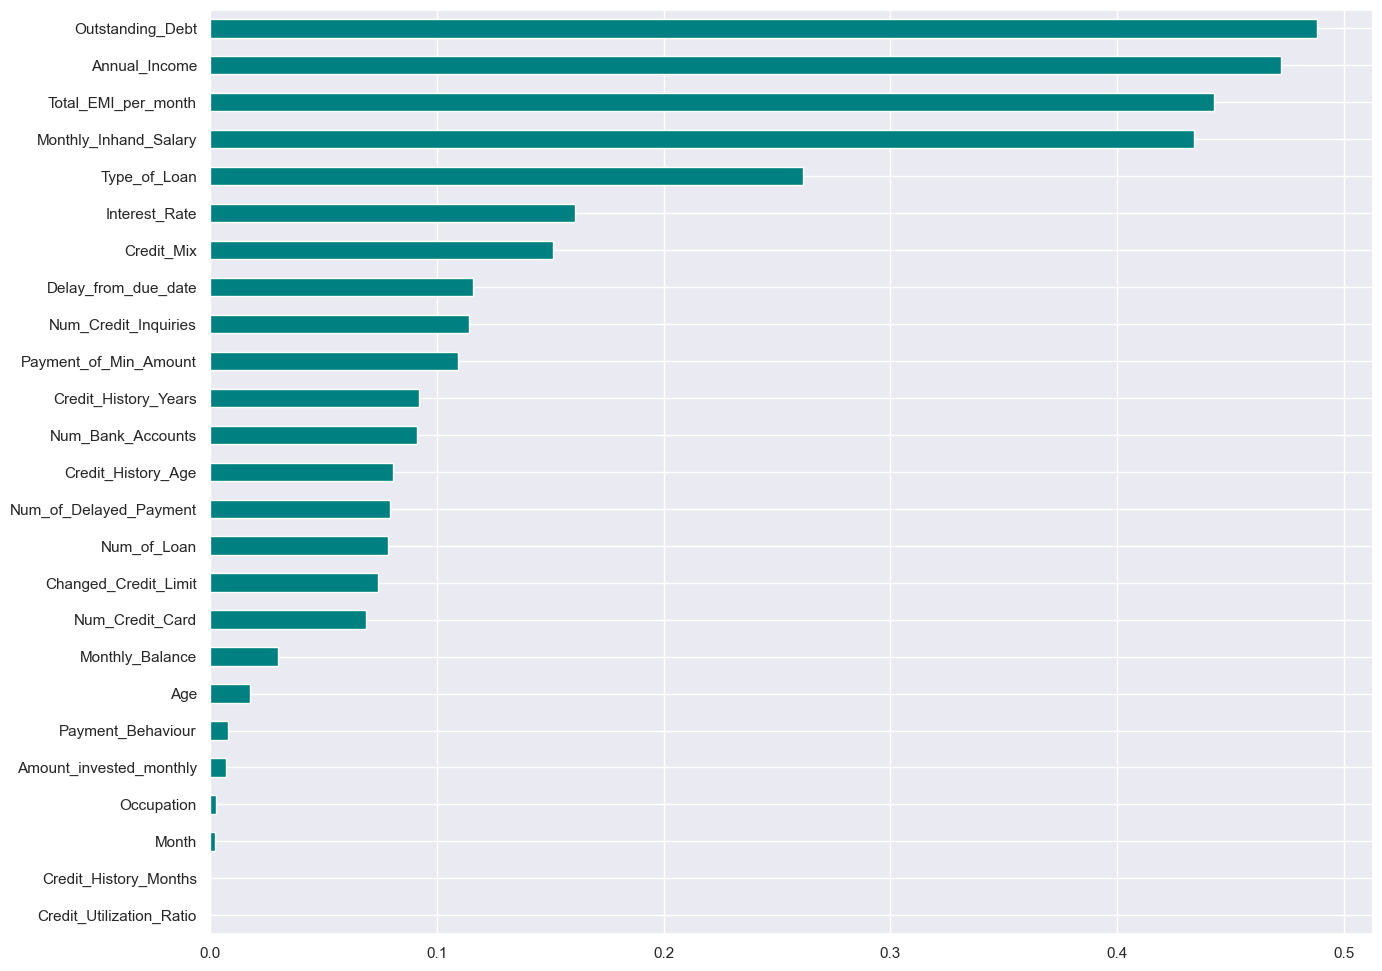

In [108]:
importances=mutual_info_classif(x,y)
mut_clf=pd.Series(importances,x.columns)
mut_clf.sort_values(ascending=True).plot(kind='barh',color='teal')
plt.show()

##### Based on the Feature selection it makes more sense that the Credit Score depends on 'Outstanding_Debt', 'Annual_Income', 'Total_EMI_per_month','Monthly_Inhand_Salary', 'Type_of_Loan', 'Interest_Rate', 'Credit_Mix','Delay_from_due_date', 'Payment_of_Min_Amount', 'Num_Credit_Inquiries'

# Selecting only Top 10 features based on scores

In [199]:
mut_features=mut_clf.sort_values(ascending=False)[:10]
mut_features

Outstanding_Debt         0.488361
Annual_Income            0.472295
Total_EMI_per_month      0.442800
Monthly_Inhand_Salary    0.433899
Type_of_Loan             0.261382
Interest_Rate            0.160967
Credit_Mix               0.151175
Delay_from_due_date      0.115721
Num_Credit_Inquiries     0.114134
Payment_of_Min_Amount    0.109244
dtype: float64

In [200]:
df1=df[mut_features.index]
df1

,Outstanding_Debt,Annual_Income,Total_EMI_per_month,Monthly_Inhand_Salary,Type_of_Loan,Interest_Rate,Credit_Mix,Delay_from_due_date,Num_Credit_Inquiries,Payment_of_Min_Amount
0,809.98,19114.12,49.574949,1824.843333,684.0,4.0,3.0,5.0,4.0,1.0
1,809.98,19114.12,49.574949,1530.815000,684.0,4.0,1.0,5.0,4.0,1.0
2,809.98,19114.12,49.574949,1530.815000,684.0,4.0,1.0,5.0,4.0,1.0
3,809.98,19114.12,49.574949,1530.815000,684.0,4.0,1.0,5.0,4.0,1.0
4,809.98,19114.12,49.574949,1824.843333,684.0,4.0,1.0,6.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
99995,502.38,39628.99,35.104023,3359.415833,684.0,7.0,3.0,23.0,3.0,1.0
99996,502.38,39628.99,35.104023,3359.415833,684.0,7.0,3.0,18.0,3.0,1.0
99997,502.38,39628.99,35.104023,3359.415833,684.0,23.0,1.0,27.0,3.0,1.0
99998,502.38,39628.99,35.104023,3359.415833,684.0,7.0,1.0,20.0,3.0,1.0


In [201]:
Xf_train,Xf_test,yf_train,yf_test=train_test_split(df1,y,test_size=0.3,random_state=42)

In [210]:
Xf_train=scaler.fit_transform(Xf_train)
Xf_test=scaler.transform(Xf_test)

# Logistic Regression

In [211]:
lg_clf=LogisticRegression(multi_class='ovr').fit(Xf_train,yf_train)
y_pred=lg_clf.predict(Xf_test)
print('Training_accuracy:{}'.format(lg_clf.score(Xf_train,yf_train)))
print('Testing_accuracy:{}'.format(accuracy_score(yf_test,y_pred)))
print(classification_report(yf_test,y_pred))

Training_accuracy:0.6092142857142857
Testing_accuracy:0.6049666666666667
              precision    recall  f1-score   support

        Good       0.51      0.27      0.35      5322
        Poor       0.61      0.56      0.58      8805
    Standard       0.61      0.74      0.67     15873

    accuracy                           0.60     30000
   macro avg       0.58      0.52      0.54     30000
weighted avg       0.60      0.60      0.59     30000



# Random Forest

In [212]:
rf_clf=RandomForestClassifier().fit(Xf_train,yf_train)
y_pred=rf_clf.predict(Xf_test)
print('Training_accuracy:{}'.format(rf_clf.score(Xf_train,yf_train)))
print('Testing_accuracy:{}'.format(accuracy_score(yf_test,y_pred)))
print(classification_report(yf_test,y_pred))

Training_accuracy:0.9376714285714286
Testing_accuracy:0.7654666666666666
              precision    recall  f1-score   support

        Good       0.70      0.71      0.71      5322
        Poor       0.77      0.77      0.77      8805
    Standard       0.78      0.79      0.78     15873

    accuracy                           0.77     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.77      0.77      0.77     30000



# Resampling the selected features

In [213]:
from imblearn.over_sampling import SMOTE

In [214]:
smote=SMOTE()
xs_resampled1,ys_resampled2=smote.fit_resample(df1,y)

In [215]:
Xf_train1,Xf_test1,yf_train1,yf_test1=train_test_split(xs_resampled1,ys_resampled2,test_size=0.3,random_state=42)

In [216]:
Xf_train1=scaler.fit_transform(Xf_train1)
Xf_test1=scaler.transform(Xf_test1)

In [217]:
rf_clf=RandomForestClassifier().fit(Xf_train1,yf_train1)
y_pred=rf_clf.predict(Xf_test1)
print('Training_accuracy:{}'.format(rf_clf.score(Xf_train1,yf_train1)))
print('Testing_accuracy:{}'.format(accuracy_score(yf_test1,y_pred)))
print(classification_report(yf_test1,y_pred))

Training_accuracy:0.9595486499798505
Testing_accuracy:0.8396472825292016
              precision    recall  f1-score   support

        Good       0.85      0.91      0.88     15951
        Poor       0.85      0.85      0.85     15954
    Standard       0.81      0.75      0.78     15952

    accuracy                           0.84     47857
   macro avg       0.84      0.84      0.84     47857
weighted avg       0.84      0.84      0.84     47857



# KNN

In [218]:
knn_clf=KNeighborsClassifier().fit(X_train1,y_train1)
y_pred=knn_clf.predict(X_test1)
print('Training_accuracy:{}'.format(knn_clf.score(X_train1,y_train1)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test1,y_pred)))
print(classification_report(y_test1,y_pred))

Training_accuracy:0.8319616710697174
Testing_accuracy:0.7564201684184132
              precision    recall  f1-score   support

           0       0.72      0.95      0.82     15951
           1       0.77      0.83      0.80     15954
           2       0.80      0.49      0.61     15952

    accuracy                           0.76     47857
   macro avg       0.77      0.76      0.74     47857
weighted avg       0.77      0.76      0.74     47857



# Xgboost

In [219]:
import xgboost as xg

In [220]:
yf_train1f=lb.fit_transform(yf_train1)
yf_test1f=lb.transform(yf_test1)

In [221]:
xg_clf=xg.XGBClassifier().fit(Xf_train1,yf_train1f)
y_pred=xg_clf.predict(Xf_test1)
print('Training_accuracy:{}'.format(xg_clf.score(Xf_train1,yf_train1f)))
print('Testing_accuracy:{}'.format(accuracy_score(yf_test1f,y_pred)))
print(classification_report(yf_test1f,y_pred))

Training_accuracy:0.8235705010522545
Testing_accuracy:0.7992979083519652
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     15951
           1       0.80      0.84      0.82     15954
           2       0.81      0.66      0.73     15952

    accuracy                           0.80     47857
   macro avg       0.80      0.80      0.80     47857
weighted avg       0.80      0.80      0.80     47857



### After feature selection the models which has bulit we got quite a improved accuracy rather using all the features with imbalanced datasets

# RFE

In [111]:
from sklearn.feature_selection import RFE

In [127]:
rfe_imp=RFE(estimator=RandomForestClassifier(),n_features_to_select=10)

In [128]:
rfe_imp.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [129]:
rfe_pred=rfe_imp.predict(X_test)

In [130]:
print('Training_accuracy:{}'.format(rfe_imp.score(X_train,y_train)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test,rfe_pred)))
print(classification_report(y_test,rfe_pred))

Training_accuracy:0.9997285714285714
Testing_accuracy:0.7228666666666667
              precision    recall  f1-score   support

        Good       0.62      0.65      0.63      5322
        Poor       0.73      0.70      0.72      8805
    Standard       0.76      0.76      0.76     15873

    accuracy                           0.72     30000
   macro avg       0.70      0.70      0.70     30000
weighted avg       0.72      0.72      0.72     30000



# Accuracy is not much improved using rfe method

## Now Lets upsample the data without any feature selection will try to build the model and check the accuracy

In [132]:
from imblearn.over_sampling import SMOTE

In [225]:
x

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Years,Credit_History_Months
0,3.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,4.0,4.0,684.0,5.0,7.0,11.27,4.0,3.0,809.98,26.822620,180.0,1.0,49.574949,80.415295,2.0,312.494089,22.0,1.0
1,2.0,23.0,12.0,19114.12,1530.815000,3.0,4.0,4.0,4.0,684.0,5.0,6.0,11.27,4.0,1.0,809.98,31.944960,357.0,1.0,49.574949,118.280222,3.0,284.629162,1.0,0.0
2,6.0,23.0,12.0,19114.12,1530.815000,3.0,4.0,4.0,4.0,684.0,5.0,7.0,9.87,4.0,1.0,809.98,28.609352,184.0,1.0,49.574949,81.699521,4.0,331.209863,22.0,3.0
3,0.0,23.0,12.0,19114.12,1530.815000,3.0,4.0,4.0,4.0,684.0,5.0,4.4,6.27,4.0,1.0,809.98,31.377862,185.0,1.0,49.574949,199.458074,5.0,223.451310,22.0,4.0
4,6.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,4.0,4.0,684.0,6.0,6.0,11.27,4.0,1.0,809.98,25.345261,186.0,1.0,49.574949,44.600703,1.0,341.489231,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,684.0,23.0,7.0,11.50,3.0,3.0,502.38,34.663572,307.0,1.0,35.104023,60.971333,0.0,479.866228,26.0,6.0
99996,6.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,684.0,18.0,7.0,11.50,3.0,3.0,502.38,37.317021,308.0,1.0,35.104023,54.185950,1.0,496.651610,26.0,7.0
99997,5.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,23.0,2.0,684.0,27.0,6.0,11.50,3.0,1.0,502.38,37.317021,309.0,1.0,35.104023,44.600703,0.0,516.809083,26.0,8.0
99998,4.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,684.0,20.0,8.6,11.50,3.0,1.0,502.38,33.638208,310.0,1.0,35.104023,251.672582,3.0,319.164979,26.0,9.0


In [134]:
smote=SMOTE()
xs_resampled,ys_resampled=smote.fit_resample(x,y)

In [136]:
ys_resampled.value_counts()

Good        53174
Standard    53174
Poor        53174
Name: Credit_Score1, dtype: int64

In [137]:
x_train1,x_test1,y_train1,y_test1=train_test_split(xs_resampled,ys_resampled,test_size=0.3,random_state=42)

In [138]:
X_train1=scaler.fit_transform(x_train1)
X_test1=scaler.transform(x_test1)

# Logistic regression

In [141]:
lg_clf=LogisticRegression(multi_class='ovr').fit(X_train1,y_train1)
y_pred=lg_clf.predict(X_test1)
print('Training_accuracy:{}'.format(lg_clf.score(X_train1,y_train1)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test1,y_pred)))
print(classification_report(y_test1,y_pred))

Training_accuracy:0.6759593426767564
Testing_accuracy:0.6760766450049105
              precision    recall  f1-score   support

        Good       0.67      0.81      0.73     15951
        Poor       0.71      0.73      0.72     15954
    Standard       0.64      0.49      0.55     15952

    accuracy                           0.68     47857
   macro avg       0.67      0.68      0.67     47857
weighted avg       0.67      0.68      0.67     47857



## After resampling the accuracy is well improved from 62% to 67%

# Random forest

In [143]:
rf_clf=RandomForestClassifier().fit(X_train1,y_train1)
y_pred=rf_clf.predict(X_test1)
print('Training_accuracy:{}'.format(rf_clf.score(X_train1,y_train1)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test1,y_pred)))
print(classification_report(y_test1,y_pred))

Training_accuracy:1.0
Testing_accuracy:0.8227636500407464
              precision    recall  f1-score   support

        Good       0.81      0.92      0.86     15951
        Poor       0.84      0.83      0.84     15954
    Standard       0.82      0.72      0.76     15952

    accuracy                           0.82     47857
   macro avg       0.82      0.82      0.82     47857
weighted avg       0.82      0.82      0.82     47857



In [ ]:
# Test accuracy has well improved from 70% to 82% without and with resampling technique

# knn

In [146]:
knn_clf=KNeighborsClassifier().fit(X_train1,y_train1)
y_pred=knn_clf.predict(X_test1)
print('Training_accuracy:{}'.format(knn_clf.score(X_train1,y_train1)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test1,y_pred)))
print(classification_report(y_test1,y_pred))

Training_accuracy:0.8319616710697174
Testing_accuracy:0.7564201684184132
              precision    recall  f1-score   support

        Good       0.72      0.95      0.82     15951
        Poor       0.77      0.83      0.80     15954
    Standard       0.80      0.49      0.61     15952

    accuracy                           0.76     47857
   macro avg       0.77      0.76      0.74     47857
weighted avg       0.77      0.76      0.74     47857



# Xgboost

In [172]:
import xgboost as xg

In [175]:
y_train1=lb.fit_transform(y_train1)
y_test1=lb.transform(y_test1)

In [224]:
X_train1

array([[-1.70914763,  1.21469883,  1.23388433, -1.11409103, -1.15580106,
        -1.46093181, -0.8314826 , -1.18445472, -0.01940596, -0.30193057,
        -1.24948947, -1.56636615, -1.20628616, -0.130324  , -0.53836404,
        -1.34310012,  1.30331113,  0.29818629, -0.50911845, -0.87264507,
        -0.50181128,  1.17470694, -0.8255009 ,  1.191621  ,  1.3207084 ],
       [ 1.33529088,  1.09726765,  0.21025472, -0.58354538, -0.65810872,
         1.31954742,  1.17277963,  0.98005364,  1.44271046,  1.19406448,
         1.37441021,  1.25495283,  0.84331483,  1.42908616,  1.54372646,
         1.18299171, -0.49408205, -1.34268816,  1.00826526,  0.30099884,
        -0.3680123 ,  1.17470694, -0.68659936, -0.28337248, -1.5642409 ],
       [ 0.32047805, -1.60364941, -0.55746749,  0.38398457,  0.29955256,
         1.31954742,  1.17277963,  0.69145252,  1.44271046,  1.19406448,
         1.37441021,  0.48198873,  1.5105298 ,  1.42908616, -1.57940929,
         1.51225306, -0.29930761,  1.40169834, -2

In [222]:
xg_clf=xg.XGBClassifier().fit(X_train1,y_train1)
y_pred=xg_clf.predict(X_test1)
print('Training_accuracy:{}'.format(xg_clf.score(X_train1,y_train1)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test1,y_pred)))
print(classification_report(y_test1,y_pred))

Training_accuracy:0.8695383513186764
Testing_accuracy:0.8236621601855528
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15951
           1       0.85      0.81      0.83     15954
           2       0.78      0.77      0.77     15952

    accuracy                           0.82     47857
   macro avg       0.82      0.82      0.82     47857
weighted avg       0.82      0.82      0.82     47857



In [226]:
import pickle

In [ ]:
pickle.dump()

In [ ]:
# We got better results in xgboost classifier

# Adaboost

In [180]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [181]:
ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()).fit(X_train1,y_train1)
y_pred=ada_clf.predict(X_test1)
print('Training_accuracy:{}'.format(ada_clf.score(X_train1,y_train1)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test1,y_pred)))
print(classification_report(y_test1,y_pred))

Training_accuracy:1.0
Testing_accuracy:0.7171155734793239
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     15951
           1       0.71      0.73      0.72     15954
           2       0.67      0.66      0.66     15952

    accuracy                           0.72     47857
   macro avg       0.72      0.72      0.72     47857
weighted avg       0.72      0.72      0.72     47857



In [147]:
from sklearn.decomposition import PCA

In [151]:
pca=PCA()
Xp_train=pca.fit_transform(X_train1)
Xp_test=pca.fit(X_test1)

In [156]:
pca.explained_variance_

array([6.54561786, 2.77875894, 1.47062312, 1.31780542, 1.17478758,
       1.10470374, 1.00061469, 0.99446889, 0.94452243, 0.93600662,
       0.80405591, 0.79661934, 0.68927354, 0.6612852 , 0.60783302,
       0.55164637, 0.43745437, 0.41551894, 0.37776139, 0.34971221,
       0.33562446, 0.30448483, 0.24263206, 0.1413457 , 0.01466153])

In [157]:
# As we can see there are 7 pca components having eigen values greater than 1

In [167]:
pca1=PCA(n_components=7)
X_train2=pca1.fit_transform(X_train1)
X_test2=pca1.transform(X_test1)

In [163]:
pca1.explained_variance_

array([6.54561786, 2.7787588 , 1.47058359, 1.31771912, 1.17446939,
       1.10463965, 1.00044079])

In [164]:
y_train2=y_train1
y_test2=y_test1

# Random Forest

In [169]:
rf_clf=RandomForestClassifier().fit(X_train2,y_train2)
y_pred=rf_clf.predict(X_test2)
print('Training_accuracy:{}'.format(rf_clf.score(X_train2,y_train2)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test2,y_pred)))
print(classification_report(y_test2,y_pred))

Training_accuracy:0.9999910446424574
Testing_accuracy:0.7177006498526861
              precision    recall  f1-score   support

        Good       0.70      0.85      0.77     15951
        Poor       0.76      0.75      0.75     15954
    Standard       0.68      0.56      0.61     15952

    accuracy                           0.72     47857
   macro avg       0.72      0.72      0.71     47857
weighted avg       0.72      0.72      0.71     47857



# KNN

In [170]:
knn_clf=KNeighborsClassifier().fit(X_train2,y_train2)
y_pred=knn_clf.predict(X_test2)
print('Training_accuracy:{}'.format(knn_clf.score(X_train2,y_train2)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test2,y_pred)))
print(classification_report(y_test2,y_pred))

Training_accuracy:0.7707697129807908
Testing_accuracy:0.6749482834277117
              precision    recall  f1-score   support

        Good       0.66      0.84      0.74     15951
        Poor       0.71      0.72      0.71     15954
    Standard       0.65      0.46      0.54     15952

    accuracy                           0.67     47857
   macro avg       0.67      0.67      0.67     47857
weighted avg       0.67      0.67      0.67     47857



# XGboost

In [184]:
y_train2=lb.fit_transform(y_train2)
y_test2=lb.transform(y_test2)

In [185]:
xg_clf=xg.XGBClassifier().fit(X_train2,y_train2)
y_pred=xg_clf.predict(X_test2)
print('Training_accuracy:{}'.format(xg_clf.score(X_train2,y_train2)))
print('Testing_accuracy:{}'.format(accuracy_score(y_test2,y_pred)))
print(classification_report(y_test2,y_pred))

Training_accuracy:0.7122554067971164
Testing_accuracy:0.6834527864262281
              precision    recall  f1-score   support

           0       0.67      0.81      0.74     15951
           1       0.74      0.71      0.72     15954
           2       0.64      0.53      0.58     15952

    accuracy                           0.68     47857
   macro avg       0.68      0.68      0.68     47857
weighted avg       0.68      0.68      0.68     47857



# By using the pca components,accuracy is not improved

# Summary

## We got the best result using XGBOOST using upsampled data without any feature selection
## Training_accuracy:86.95%
## Testing_accuracy:82.36%
## Clearly there is no much over fitting